#Goal:

Looking into reviews and information regarding the success of books to try to predict which ones will become movies/series
* Make a model to predict if a book will be made into a movie/series
* See what features (if any) have a strong or surprising correlation to if the book was made into a movie/series

---

##Target:
Whether the book has been made into a screenplay




## Data Sources
There are three seperate sources of data. Under the first dataset (GoodReadsBooks) we have a function 'clean_match' wich takes a given dataset and matches the books with movies to start making a 'made_into_movie' column. This is used on the following two datasets as well

#First Dataset: GoodReadsBooks
###(https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks/data)

Using this dataset with https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=keywords.csv (Movies Dataset) and cleaning up titles so that they can be matched with one from this set https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv

An example of what features the dataset:
* average_rating
* language_code
* num_pages
* ratings_count
* text_reviews_count
* publication_date
* publisher
* counting the amount of Editions of a book (repeats of the same book but different edition in the dataset)

## Example of how to match movies with books and get the edition count (see below)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

path = '/content/drive/MyDrive/BigDataFinal/books.csv'
df1 = pd.read_csv(path)
df1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11122   45631   Expelled from Eden: A William T. Vollmann Reader   
11123   45633                        You Bright and Risen Angels   
11124   45634                    The Ice-Shirt (Seven Dreams #1)   
11125   45639                                        Poor People   
11126   45641                        Las aventuras de Tom Sawyer   

                                                 authors average_rating  \
0                             J.K. Rowling/Mary GrandPré           4.57   
1                             J.K. Rowling/Mary GrandPré           4.49   
2                                           J.K. Rowling           4.42   
3                             J.K. Rowling/Mary GrandPré           4.56   
4                             J.K. Rowling/Mary GrandPré           4.78   
...                                                  ...            ...   
11122  William T. Vollmann/Larry McCaffery/Michael He...           4.06   
11123                                William T. Vollmann           4.08   
11124                                William T. Vollmann           3.96   
11125                                William T. Vollmann           3.72   
11126                                         Mark Twain           3.91   

             isbn         isbn13 language_code num_pages  ratings_count  \
0       439785960  9780439785969           eng       652        2095690   
1       439358078  9780439358071           eng       870        2153167   
2       439554896  9780439554893           eng       352           6333   
3      043965548X  9780439655484           eng       435        2339585   
4       439682584  9780439682589           eng      2690          41428   
...           ...            ...           ...       ...            ...   
11122  1560254416  9781560254416           eng       512            156   
11123   140110879  9780140110876           eng       635            783   
11124   140131965  9780140131963           eng       415            820   
11125    60878827  9780060878825           eng       434            769   
11126  8497646983  9788497646987           spa       272            113   

       text_reviews_count publication_date        publisher Unnamed: 12  
0                   27591        9/16/2006  Scholastic Inc.         NaN  
1                   29221         9/1/2004  Scholastic Inc.         NaN  
2                     244        11/1/2003       Scholastic         NaN  
3                   36325         5/1/2004  Scholastic Inc.         NaN  
4                     164        9/13/2004       Scholastic         NaN  
...                   ...              ...              ...         ...  
11122                  20       12/21/2004    Da Capo Press         NaN  
11123                  56        12/1/1988    Penguin Books         NaN  
11124                  95         8/1/1993    Penguin Books         NaN  
11125                 139        2/27/2007             Ecco         NaN  
11126                  12        5/28/2006    Edimat Libros         NaN  

[11127 rows x 13 columns]

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

path = '/content/drive/MyDrive/BigDataFinal/Movies Dataset/keywords.csv'
df = pd.read_csv(path)
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


id                                           keywords
0         862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1        8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2       15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3       31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4       11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...
...       ...                                                ...
46414  439050             [{'id': 10703, 'name': 'tragic love'}]
46415  111109  [{'id': 2679, 'name': 'artist'}, {'id': 14531,...
46416   67758                                                 []
46417  227506                                                 []
46418  461257                                                 []

[46419 rows x 2 columns]

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

path = '/content/drive/MyDrive/BigDataFinal/Movies Dataset/movies_metadata.csv'
movies_df = pd.read_csv(path)
movies_df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-34-8990a706060d>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(path)


adult                              belongs_to_collection    budget  \
0      False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1      False                                                NaN  65000000   
2      False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3      False                                                NaN  16000000   
4      False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
...      ...                                                ...       ...   
45461  False                                                NaN         0   
45462  False                                                NaN         0   
45463  False                                                NaN         0   
45464  False                                                NaN         0   
45465  False                                                NaN         0   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                         [{'id': 35, 'name': 'Comedy'}]   
...                                                  ...   
45461  [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...   
45462                      [{'id': 18, 'name': 'Drama'}]   
45463  [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...   
45464                                                 []   
45465                                                 []   

                                   homepage      id    imdb_id  \
0      http://toystory.disney.com/toy-story     862  tt0114709   
1                                       NaN    8844  tt0113497   
2                                       NaN   15602  tt0113228   
3                                       NaN   31357  tt0114885   
4                                       NaN   11862  tt0113041   
...                                     ...     ...        ...   
45461  http://www.imdb.com/title/tt6209470/  439050  tt6209470   
45462                                   NaN  111109  tt2028550   
45463                                   NaN   67758  tt0303758   
45464                                   NaN  227506  tt0008536   
45465                                   NaN  461257  tt6980792   

      original_language               original_title  \
0                    en                    Toy Story   
1                    en                      Jumanji   
2                    en             Grumpier Old Men   
3                    en            Waiting to Exhale   
4                    en  Father of the Bride Part II   
...                 ...                          ...   
45461                fa                      رگ خواب   
45462                tl          Siglo ng Pagluluwal   
45463                en                     Betrayal   
45464                en          Satana likuyushchiy   
45465                en                     Queerama   

                                                overview  ... release_date  \
0      Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1      When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2      A family wedding reignites the ancient feud be...  ...   1995-12-22   
3      Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4      Just when George Banks has recovered from his ...  ...   1995-02-10   
...                                                  ...  ...          ...   
45461        Rising and falling between a man and woman.  ...          NaN   
45462  An artist struggles to finish his work while a...  ...   2011-11-17   
45463  When one of her hits goes wrong, a professiona...  ...   2003-08-01   
45464  In a small town live two brothers, one a minis...  ...   1917-10-21   
45465  50 years after decriminalisati

## Checking what we want to do is possible
below we are grabbing the frequency we see words in the keywords column of the movies dataset so we know if we can find words indicating the movie is based on a novel

In [ ]:
import pandas as pd
import ast
from collections import Counter

word_count = Counter()

for index, row in df.iterrows():
    # Parse the string representation
    keywords_list = ast.literal_eval(row['keywords'])
    # Increment the count for each keyword found
    for keyword_dict in keywords_list:
        keyword_name = keyword_dict['name'].lower()  # Convert to lowercase
        word_count[keyword_name] += 1

# Df from the Counter
frequency_df = pd.DataFrame(word_count.items(), columns=[ 'Keyword', 'Frequency'])

In [ ]:
print(frequency_df.sort_values(by=['Frequency'], ascending = False))

                Keyword  Frequency
132      woman director       3115
261    independent film       1930
41               murder       1308
19       based on novel        835
343             musical        734
...                 ...        ...
13704      longest film          1
13702   figher airplane          1
13701          all girl          1
6268     ancient scroll          1
19955              acab          1

[19956 rows x 2 columns]


### Searching for keywords indicating a movie originated from a book

In [ ]:

keywords_to_search = ['book', 'novel', 'comic']
pattern = r'based on.*(' + '|'.join(keywords_to_search) + ')'

filtered_df = frequency_df[frequency_df['Keyword'].str.contains(pattern, case=False)]

print(filtered_df.sort_values(by=['Frequency'], ascending=False).head(20))

                          Keyword  Frequency
19                 based on novel        835
901                based on comic        161
5345   based on young adult novel         66
11       based on children's book         32
902        based on graphic novel         22
19140        based on light novel          3


<ipython-input-37-1bb7917b2d42>:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtered_df = frequency_df[frequency_df['Keyword'].str.contains(pattern, case=False)]


^ Yay! there is hope we can match our books with this movie set.

In [ ]:
# Filter and print rows where 'id' contains non-numerical values such as '-'
non_numerical_ids = movies_df[movies_df['id'].astype(str).str.contains('-')]
print(non_numerical_ids)

movies_df = movies_df[~movies_df['id'].astype(str).str.contains('-')]
movies_df['id'] = movies_df['id'].astype(int)


df['id'] = df['id'].astype(int)
movies_with_keywords = pd.merge(movies_df, df, on='id', how='right')

                                                   adult  \
19730                                 - Written by Ørnås   
29503   Rune Balot goes to a casino connected to the ...   
35587   Avalanche Sharks tells the story of a bikini ...   

      belongs_to_collection                            budget  \
19730              0.065736  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   
29503              1.931659  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg   
35587              2.185485  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                  genres  \
19730  [{'name': 'Carousel Productions', 'id': 11176}...   
29503  [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...   
35587  [{'name': 'Odyssey Media', 'id': 17161}, {'nam...   

                                                homepage          id imdb_id  \
19730  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...  1997-08-20       0   
29503  [{'iso_3166_1': 'US', 'name': 'United States o...  2012-09-29       0   
35587           [

<ipython-input-38-c92b4115b958>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['id'] = movies_df['id'].astype(int)


In [ ]:
movies_based_on = movies_with_keywords[movies_with_keywords['keywords'].str.contains(pattern, case=False)]

based_on_titles = set(movies_based_on['original_title'])


unoriginal_movies = {title: (title in based_on_titles) for title in movies_with_keywords['original_title']}

print(unoriginal_movies)

#All Quiet on the Western Front shows that using keywords is not a reliable confirmation metric
print(unoriginal_movies.get("All Quiet on the Western Front"))
print(movies_df[movies_df['original_title']=="All Quiet on the Western Front"])
row = df[df['id'] == 10912]


pd.set_option('display.max_colwidth', None)


print(row)

<ipython-input-39-e1fe5dee4809>:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  movies_based_on = movies_with_keywords[movies_with_keywords['keywords'].str.contains(pattern, case=False)]


{'Toy Story': False, 'Jumanji': True, 'Grumpier Old Men': False, 'Waiting to Exhale': True, 'Father of the Bride Part II': False, 'Heat': False, 'Sabrina': False, 'Tom and Huck': False, 'Sudden Death': False, 'GoldenEye': False, 'The American President': False, 'Dracula: Dead and Loving It': False, 'Balto': False, 'Nixon': False, 'Cutthroat Island': False, 'Casino': False, 'Sense and Sensibility': True, 'Four Rooms': False, 'Ace Ventura: When Nature Calls': False, 'Money Train': False, 'Get Shorty': True, 'Copycat': False, 'Assassins': False, 'Powder': False, 'Leaving Las Vegas': False, 'Othello': False, 'Now and Then': False, 'Persuasion': False, 'La Cité des Enfants Perdus': False, '摇啊摇，摇到外婆桥': False, 'Dangerous Minds': False, 'Twelve Monkeys': False, 'Guillaumet, les ailes du courage': False, 'Babe': False, 'Carrington': False, 'Dead Man Walking': False, 'Across the Sea of Time': False, 'It Takes Two': False, 'Clueless': False, 'Cry, the Beloved Country': False, 'Richard III': False

## The 'clean_match' Function

Below we then use the Rapidfuzz library to clean the titles from the movies and book dfs respectively and then match the movie titles to book titles to see how many books are mad into movies.


This method is used instead of just matching string names because it allows for some discrepancies when the title of a book is made into a movie.

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

path = '/content/drive/MyDrive/BigDataFinal/books.csv'
df1 = pd.read_csv(path)

def remove_parentheses(text):
    return text.str.replace(r'\(.*?\)', '', regex=True)
# Normalize and clean titles in both DataFrames

movies_df['normalized_title'] = remove_parentheses(movies_df['title'].str.lower()).replace('[^\w\s]', '', regex=True)
movies_dict = movies_df.set_index('normalized_title')['title'].to_dict()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-40-dbf874e9f2a0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['normalized_title'] = remove_parentheses(movies_df['title'].str.lower()).replace('[^\w\s]', '', regex=True)


In [ ]:
import pandas as pd
!pip install rapidfuzz
from rapidfuzz import process, fuzz
from concurrent.futures import ProcessPoolExecutor


# Function to perform matching
def match_title(book_title):
    best_match = process.extractOne(book_title, movies_dict.keys(), scorer=fuzz.token_sort_ratio, score_cutoff=90)
    if best_match:
        return (movies_dict[best_match[0]], best_match[1])
    return (None, None)


def clean_match(df, date_column_name):
  """
  normalizes and cleans the titles in the df and matches the titles to
  the movie df we are using to verify if a book is made into a movie
  and then gives a score for how much a movie title matches with the corresponding
  book title
  df: book df
  date_column_name: name of date column in movie df
  colmn_to_drop_matches: name of column used to drop repeates in dataset
  returns: df (normalized_title, matched_movie_title, and match_score columns added)
  """
  df['normalized_title'] = remove_parentheses(df['title'].str.lower()).replace('[^\w\s]', '', regex=True)

  with ProcessPoolExecutor() as executor:

    results = list(executor.map(match_title, df['normalized_title']))

  matched_titles, scores = zip(*results)


  df['matched_movie_title'], df['match_score'] = matched_titles, scores

  book_df_dates = df.merge(movies_df[['title', date_column_name]], left_on='matched_movie_title', right_on='title', how='left')


  return book_df_dates



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd

def process_books(df):

    df = df.copy()


    df['primary_author'] = df['authors'].apply(lambda x: x.split('/')[0].strip())

    # Normalize title
    df['normalized_title'] = df['title'].str.lower().str.strip()

    #data types
    df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')
    df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

    # Group by normalized title and primary author
    grouped = df.groupby(['normalized_title', 'primary_author'])

    # Calculate the avg rating and count # editions
    df['average_rating'] = grouped['average_rating'].transform('mean')
    df['editions_count'] = grouped['bookID'].transform('count')


    df['is_earliest'] = df['publication_date'] == grouped['publication_date'].transform('min')


    result = df[df['is_earliest']].copy()


    result.drop(columns=['is_earliest', 'Unnamed: 12'], inplace=True)

    return result


In [ ]:
df1 = clean_match(df1, 'release_date')

book_df_dropped_duplicates = df1
book_df_dropped_duplicates = df1.drop_duplicates(subset='isbn', keep='first')
books_with_movies = book_df_dropped_duplicates
books_with_movies.drop(columns=['title_y'], inplace=True)
books_with_movies.rename(columns={'title_x': 'title'}, inplace=True)
processed_books_with_movies_df1 = process_books(books_with_movies)
#adding author count:
author_counts = processed_books_with_movies_df1['primary_author'].value_counts()

# Map the counts back to the original DataFrame
processed_books_with_movies_df1['author_book_count'] = processed_books_with_movies_df1['primary_author'].map(author_counts)

print(processed_books_with_movies_df1)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


       bookID  \
1           2   
3           5   
4           8   
7           9   
10         10   
...       ...   
31057   45631   
31060   45633   
31063   45634   
31066   45639   
31069   45641   

                                                                                         title  \
1                                 Harry Potter and the Order of the Phoenix (Harry Potter  #5)   
3                                  Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)   
4                                       Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)   
7      Unauthorized Harry Potter Book Seven News: "Half-Blood Prince" Analysis and Speculation   
10                                                Harry Potter Collection (Harry Potter  #1-6)   
...                                                                                        ...   
31057                                         Expelled from Eden: A William T. Vollmann Reader   
31060      

<ipython-input-43-cecc46d88e77>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_with_movies.drop(columns=['title_y'], inplace=True)
<ipython-input-43-cecc46d88e77>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_with_movies.rename(columns={'title_x': 'title'}, inplace=True)


In [ ]:

for index, match in processed_books_with_movies_df1.iterrows():
    movie_title = match['matched_movie_title']
    if movie_title is None:
      pass
    match_status = unoriginal_movies.get(movie_title)
    if match_status == False:
       print(f"Book: {match['title']}, Movie: {match['matched_movie_title']}")


Book: Harry Potter and the Order of the Phoenix (Harry Potter  #5), Movie: Harry Potter and the Order of the Phoenix
Book: Harry Potter and the Prisoner of Azkaban (Harry Potter  #3), Movie: Harry Potter and the Prisoner of Azkaban
Book: Hatchet (Brian's Saga  #1), Movie: Hatchet
Book: Changeling (Changeling  #1), Movie: Changeling
Book: The Changeling, Movie: The Changeling
Book: The Changeling, Movie: The Changeling
Book: The Changeling (Daughters of England  #15), Movie: The Changeling
Book: The Power of One (The Power of One  #1), Movie: The Power of One
Book: The Untouchable, Movie: The Untouchables
Book: The Untouchables, Movie: The Untouchables
Book: Miami Blues (Hoke Moseley #1), Movie: Miami Blues
Book: The Portrait of a Lady, Movie: The Portrait of a Lady
Book: The War, Movie: The War
Book: Love Letters, Movie: Love Letters
Book: Underworld, Movie: Underworld
Book: Cosmopolis, Movie: Cosmopolis
Book: Against the Day, Movie: Against the Dark
Book: Play It As It Lays, Movie: Pl

## Visuals

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualizing_df_pairplot(features, df):
  """
  features: list of features in df you want to compare
  df: a pd DataFrame
  return: none, visualizes a pairplot
  """
  # Create a subset DataFrame with only the selected features
  subset_df_all = df[features + ['made_into_movie']]
  subset_df_true = subset_df_all [subset_df_all ['made_into_movie'] == True]
  sample_size = len(subset_df_true)
  subset_df_false_sample = subset_df_all[subset_df_all ['made_into_movie'] == False].sample(sample_size) #grabs a small amount of false samples since they would overwhelm the graphs
  subset_df = pd.concat([subset_df_true, subset_df_false_sample], ignore_index=True)
  # print(len(subset_df_true))
  # subset_df
  sns.pairplot(subset_df, hue='made_into_movie',
             palette={True: 'blue', False: 'red'},plot_kws={'alpha':0.1})
  #sns.pairplot(subset_df, hue='made_into_movie', palette={True: 'green', False: 'red'})
  plt.savefig('seaborn_plot.png')
  return subset_df


average_rating  ratings_count  language_code_numeric  publication_year  \
0               4.49        2153167                      4              2004   
1               4.56        2339585                      4              2004   
2               3.72         270244                      4              2000   
3               3.60            978                      4              2006   
4               4.17           1176                      4              2004   
...              ...            ...                    ...               ...   
2823            3.59            705                      4              2006   
2824            3.94            599                      3              2006   
2825            4.35            193                      4              2006   
2826            4.15           6187                      4              1991   
2827            3.89             74                      4              1995   

      editions_count  author_book_count  made_into_movie  
0                  1                 20             True  
1                  2                 20             True  
2                  1                  7             True  
3                  1                  4             True  
4                  1                  4             True  
...              ...                ...              ...  
2823               1                  1            False  
2824               1                  2            False  
2825               1                  1            False  
2826               1                 11            False  
2827               1                  1            False  

[2828 rows x 7 columns]

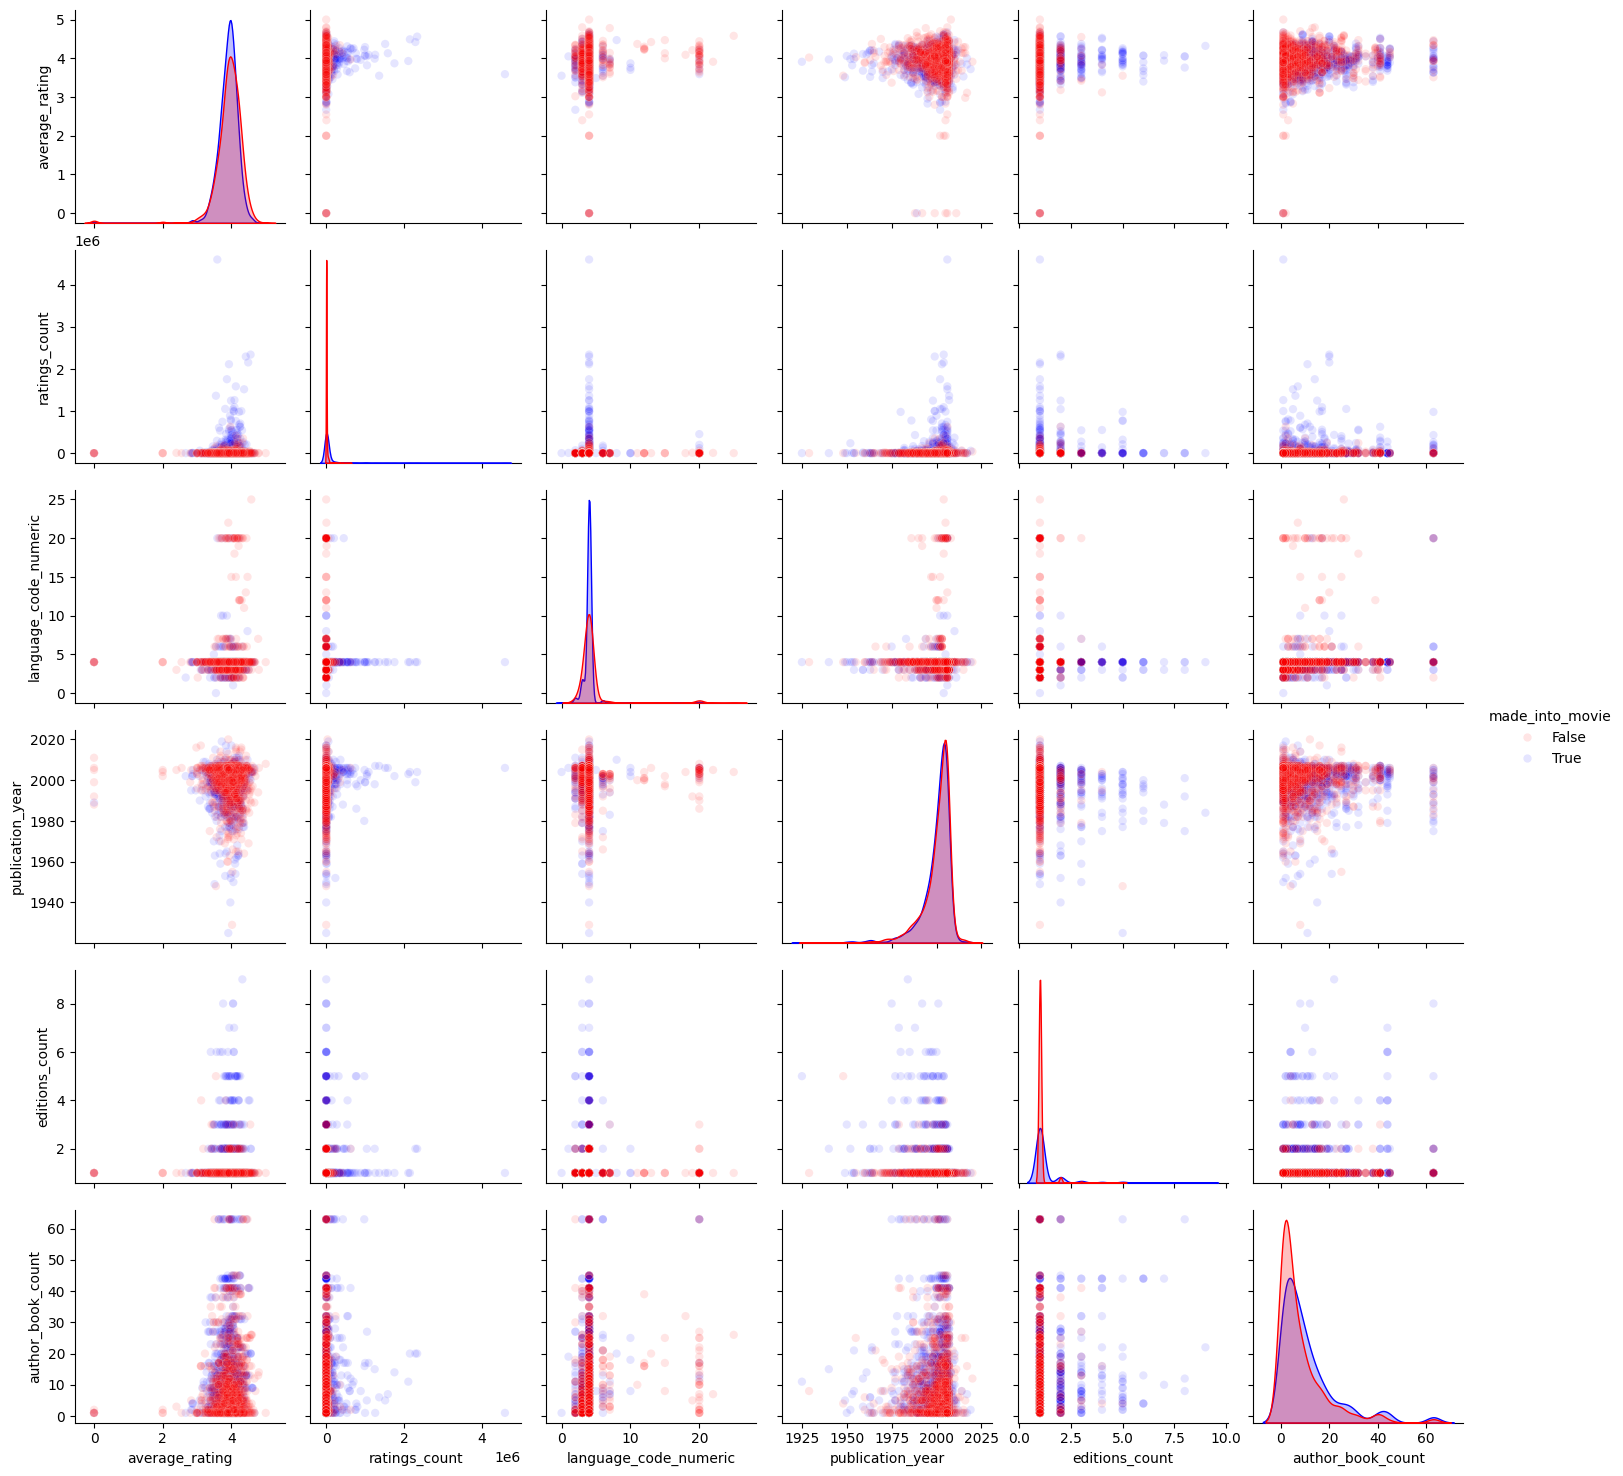

In [ ]:
import seaborn as sns

processed_books_with_movies_df1['made_into_movie'] = processed_books_with_movies_df1['match_score'].notna()

# Making DataFrame to plot by selecting specific columns
processed_books_with_movies_df1['language_code'] = processed_books_with_movies_df1['language_code'].astype('category')
processed_books_with_movies_df1['language_code_numeric'] = processed_books_with_movies_df1['language_code'].cat.codes
processed_books_with_movies_df1['publication_date'] = pd.to_datetime(processed_books_with_movies_df1['publication_date'], errors='coerce')
processed_books_with_movies_df1['publication_year'] = processed_books_with_movies_df1['publication_date'].dt.year

columns_to_plot = ['average_rating', 'ratings_count', 'language_code_numeric', 'publication_year', 'editions_count', 'author_book_count']
plot_data = processed_books_with_movies_df1[columns_to_plot + ['made_into_movie']]

visualizing_df_pairplot(columns_to_plot, plot_data)
# Plotting with seaborn
# sns.pairplot(plot_data, hue='made_into_movie', palette={True: 'green', False: 'red'})

<function matplotlib.pyplot.show(close=None, block=None)>

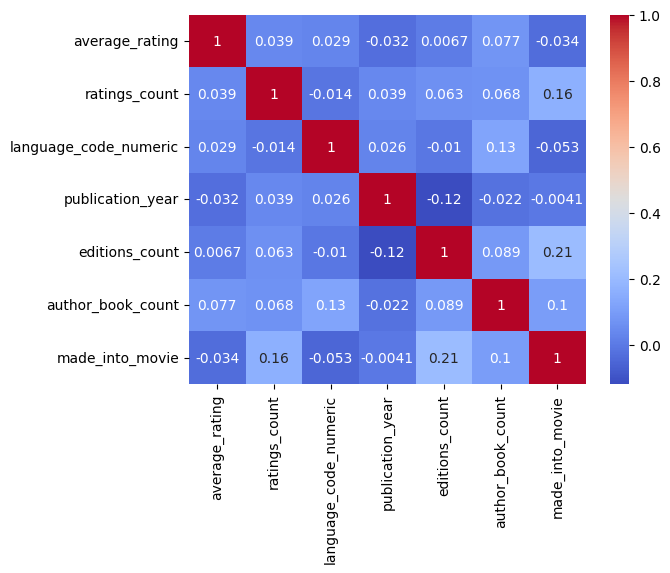

In [ ]:
corr_matrix = plot_data.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show

##Machine Learning!

In [ ]:
#visualize data
print(plot_data)

       average_rating  ratings_count  language_code_numeric  publication_year  \
1                4.49        2153167                      4              2004   
3                4.56        2339585                      4              2004   
4                4.78          41428                      4              2004   
7                3.74             19                      3              2005   
10               4.73          28242                      4              2005   
...               ...            ...                    ...               ...   
31057            4.06            156                      4              2004   
31060            4.08            783                      4              1988   
31063            3.96            820                      4              1993   
31066            3.72            769                      4              2007   
31069            3.91            113                     20              2006   

       editions_count  auth

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score, accuracy_score, classification_report
#normalization only makes a very minor difference
scaler = StandardScaler()
normalized_data = plot_data.copy()
normalized_data[columns_to_plot] = scaler.fit_transform(normalized_data[columns_to_plot])

print(normalized_data)

       average_rating  ratings_count  language_code_numeric  publication_year  \
1            1.560079      21.638779              -0.120442          0.479034   
3            1.756215      23.525526              -0.120442          0.479034   
4            2.372643       0.265747              -0.120442          0.479034   
7           -0.541380      -0.153356              -0.507606          0.598085   
10           2.232546       0.132291              -0.120442          0.598085   
...               ...            ...                    ...               ...   
31057        0.355243      -0.151969              -0.120442          0.479034   
31060        0.411282      -0.145623              -0.120442         -1.425791   
31063        0.075048      -0.145249              -0.120442         -0.830533   
31066       -0.597419      -0.145765              -0.120442          0.836189   
31069       -0.065049      -0.152405               6.074189          0.717137   

       editions_count  auth

In [ ]:
X = normalized_data[columns_to_plot]
y = normalized_data['made_into_movie']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model_NB = GaussianNB()

model_NB.fit(X_train, y_train)
y_pred_NB = model_NB.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_NB)
recall = recall_score(y_test, y_pred_NB)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(classification_report(y_test, y_pred_NB))

Accuracy: 86.44%
Recall: 20.52%
              precision    recall  f1-score   support

       False       0.89      0.96      0.93      1812
        True       0.44      0.21      0.28       268

    accuracy                           0.86      2080
   macro avg       0.67      0.58      0.60      2080
weighted avg       0.83      0.86      0.84      2080



In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_RF = RandomForestClassifier(class_weight='balanced', random_state=42)

model_RF.fit(X_train, y_train)

y_pred_RF = model_RF.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_RF)
recall = recall_score(y_test, y_pred_RF)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(classification_report(y_test, y_pred_RF))


Accuracy: 86.92%
Recall: 12.31%
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      1812
        True       0.47      0.12      0.20       268

    accuracy                           0.87      2080
   macro avg       0.68      0.55      0.56      2080
weighted avg       0.83      0.87      0.83      2080



In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression with L1 Regularization
model_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, class_weight='balanced', random_state=42)
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)
print("L1 Regularization:")

accuracy = accuracy_score(y_test, y_pred_l1)
recall = recall_score(y_test, y_pred_l1)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(classification_report(y_test, y_pred_l1))

# Logistic Regression with L2 Regularization
model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, class_weight='balanced', random_state=42)
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)
print("L2 Regularization:")

accuracy = accuracy_score(y_test, y_pred_l2)
recall = recall_score(y_test, y_pred_l2)

print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(classification_report(y_test, y_pred_l2))

L1 Regularization:
Accuracy: 76.15%
Recall: 44.40%
              precision    recall  f1-score   support

       False       0.91      0.81      0.86      1812
        True       0.26      0.44      0.32       268

    accuracy                           0.76      2080
   macro avg       0.58      0.63      0.59      2080
weighted avg       0.82      0.76      0.79      2080

L2 Regularization:
Accuracy: 76.15%
Recall: 44.40%
              precision    recall  f1-score   support

       False       0.91      0.81      0.86      1812
        True       0.26      0.44      0.32       268

    accuracy                           0.76      2080
   macro avg       0.58      0.63      0.59      2080
weighted avg       0.82      0.76      0.79      2080



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
}


model_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
grid_search_l1 = GridSearchCV(estimator=model_l1, param_grid=param_grid, cv=8, scoring='recall', verbose=1)
grid_search_l1.fit(X_train, y_train)


model_l2 = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
grid_search_l2 = GridSearchCV(estimator=model_l2, param_grid=param_grid, cv=8, scoring='recall', verbose=1)
grid_search_l2.fit(X_train, y_train)


#Outputs:
print("Best parameters for L1:", grid_search_l1.best_params_)
print("Best recall for L1:", grid_search_l1.best_score_)

print("Best parameters for L2:", grid_search_l2.best_params_)
print("Best recall for L2:", grid_search_l2.best_score_)

# Best Param results:
best_model_l1 = grid_search_l1.best_estimator_
y_pred_l1 = best_model_l1.predict(X_test)
print("L1 Regularization Best Model Test Set Results:")
print(classification_report(y_test, y_pred_l1))

best_model_l2 = grid_search_l2.best_estimator_
y_pred_l2 = best_model_l2.predict(X_test)
print("L2 Regularization Best Model Test Set Results:")
print(classification_report(y_test, y_pred_l2))

Fitting 8 folds for each of 10 candidates, totalling 80 fits
Fitting 8 folds for each of 10 candidates, totalling 80 fits
Best parameters for L1: {'C': 0.01, 'class_weight': 'balanced'}
Best recall for L1: 0.45284576534576537
Best parameters for L2: {'C': 1, 'class_weight': 'balanced'}
Best recall for L2: 0.4449847027972028
L1 Regularization Best Model Test Set Results:
              precision    recall  f1-score   support

       False       0.91      0.81      0.85      1812
        True       0.25      0.44      0.32       268

    accuracy                           0.76      2080
   macro avg       0.58      0.62      0.59      2080
weighted avg       0.82      0.76      0.79      2080

L2 Regularization Best Model Test Set Results:
              precision    recall  f1-score   support

       False       0.91      0.81      0.86      1812
        True       0.26      0.44      0.32       268

    accuracy                           0.76      2080
   macro avg       0.58      0.63  

# Second Data Set: Goodreads Book Graph Datasets
https://mengtingwan.github.io/data/goodreads.html#datasets

 Below is another goodreads dataset that is more extensive in terms in the number of books, but has less features to look at.

An example of what features the dataset has:
* 'text_reviews_count' (number of people that reviewed the book)
* 'num_pages'
* 'average_rating'
* 'ratings_count' (number of people who rated the book on goodreads)
* 'popular_shelves'




##NOTE (please read)
If you want to run everything you can, but it will take a long time, pre-processed dfs are loaded in under **'loading in pre processed versions'** to skip hours of cleaning and matching movie and book titles

First we test with a single set of books, comics, from this data source because the files are so large (~1gb each).

By 'test' we mean retrieve the data from the .json file and grab the features we want from this dataset

### Loading in Jsons with Generators

In [ ]:
#load in the json file to a generator (slightly less space than a list)
from os import linesep
import json

file_path_comic ='/content/drive/MyDrive/BigDataFinal/goodreads_books_comics_graphic.json'
file_path_fantasy_paranormal =  '/content/drive/MyDrive/BigDataFinal/goodreads_books_fantasy_paranormal.json'
file_path_history_bio = '/content/drive/MyDrive/BigDataFinal/goodreads_books_history_biography.json'
file_path_romance = '/content/drive/MyDrive/BigDataFinal/goodreads_books_romance.json'
file_path_mist_thrill = '/content/drive/MyDrive/BigDataFinal/goodreads_books_mystery_thriller_crime.json'

def read_json_file(file_path):
  with open(file_path, 'r') as file:
    for line in file:
      yield json.loads(line)

generator_comic = read_json_file(file_path_comic)


In [ ]:
#test on a singular book
#---------------------------------------------------------------------------------------
#print(comics_and_graphic_books[13] )#dictionary
#popular_shelf_total = data[13]['popular_shelves'][0]['count']
                      #sum(shelf['count'] for shelf in data[book]['popolar_shelves'])
#print(popular_shelf_total)
#---------------------------------------------------------------------------------------
#grabbing key features and making them into a df
import pandas as pd
def isolating_json_information(generator):
  """
  takes a json file output from one of the Goodreads Book Graph Datasets and returns a df of what are considered key feautures
  """
  data_list = []
  for book in generator:
    title = book['title']
    popular_shelf_total = sum(int(shelf['count']) for shelf in book['popular_shelves'])
    ratings_count = int(book['ratings_count'])
    publication_year = int(book['publication_year']) if book['publication_year'] != '' else None
    text_reviews_count = int(book['text_reviews_count'])
    num_pages = int(book['num_pages']) if book['num_pages'] != '' else None
    average_rating = float(book['average_rating'])
    data_list.append({'title': title, 'popular_shelf_total': popular_shelf_total, 'ratings_count': ratings_count, 'publication_year':publication_year, 'text_reviews_count':text_reviews_count, 'num_pages':num_pages, 'average_rating': average_rating})

  df = pd.DataFrame(data_list)
  return df

comics_and_graphic_books_df = isolating_json_information(generator_comic)

We MUST delete the generator after to avoid maxing out the RAM of the google colab. And, you know, clean code and not taking up storage and all that.

In [ ]:
del generator_comic

now we do it for all the other genres :)

In [ ]:
#Fantasy and Paranormal
generator_fantasy_paranormal = read_json_file(file_path_fantasy_paranormal)
fantasy_paranormal_books_df = isolating_json_information(generator_fantasy_paranormal)
del generator_fantasy_paranormal

#History and Biographies
generator_history_bio = read_json_file(file_path_history_bio)
history_bio_books_df = isolating_json_information(generator_history_bio)
del generator_history_bio

#Romance
generator_romance = read_json_file(file_path_romance)
romance_books_df = isolating_json_information(generator_romance)
del generator_romance

#Mystery and Thriller
generator_mist_thrill = read_json_file(file_path_mist_thrill)
mist_thrill_books_df = isolating_json_information(generator_mist_thrill)
del generator_mist_thrill

In [ ]:
def process_books2(df):
    df = df.copy()

    # Convert average_rating to numeric to ensure calculations can be performed
    df['average_rating'] = pd.to_numeric(df['average_rating'], errors='coerce')

    # Convert publication_date to datetime
    df['publication_year'] = pd.to_datetime(df['publication_year'], errors='coerce')

    # Group by normalized title
    grouped = df.groupby(['normalized_title'])

    # Calculate the average rating and count totals for ratings and reviews
    df['average_rating'] = grouped['average_rating'].transform('mean')
    df['ratings_count'] = grouped['ratings_count'].transform('sum')
    df['text_reviews_count'] = grouped['text_reviews_count'].transform('sum')


    df['is_earliest'] = df['publication_year'] == grouped['publication_year'].transform('min')


    result = df[df['is_earliest']].copy()


    result.drop(columns=['is_earliest'], inplace=True)

    return result

### Only Comic df cleanup
Here is the step by step process ran on all of the dfs with comics and graphics df as the example

In [ ]:
comics_and_graphic_books_drop = comics_and_graphic_books_df.dropna()

In [ ]:
comics_and_graphic_books_df_droped = clean_match(comics_and_graphic_books_drop, 'release_date')

In [ ]:
book_df_dropped_duplicates = comics_and_graphic_books_df_droped.drop_duplicates(subset=['title_x', 'popular_shelf_total'] , keep='first')
books_with_movies = book_df_dropped_duplicates
books_with_movies.drop(columns=['title_y'], inplace=True)
books_with_movies.rename(columns={'title_x': 'title'}, inplace=True)
comics_and_graphic_books_df_droped = process_books2(books_with_movies)

In [ ]:
# Create the "Made into Movie" column
comics_and_graphic_books_df_droped['made_into_movie'] = comics_and_graphic_books_df_droped['match_score'] > 90 #this changes for each df depending on how good the matching looks

# Rename 'release_date' to 'movie_release_date' for clarity
comics_and_graphic_books_df_droped.rename(columns={'release_date': 'movie_release_date'}, inplace=True)

comics_and_graphic_books_df_droped.drop(columns=['normalized_title','match_score'],
        inplace=True)

### Rest of genres clean up
*NOTE:* all of these have been pre-processed and are loaded in later for anaysis because they each took over 25min to 'clean_match',

please go to loading in pre processed versions if you want to run things

In [ ]:
def last_clean (df):
  book_df_dropped_duplicates = df.drop_duplicates(subset=['title_x', 'popular_shelf_total'] , keep='first')
  books_with_movies = book_df_dropped_duplicates
  books_with_movies.drop(columns=['title_y'], inplace=True)
  books_with_movies.rename(columns={'title_x': 'title'}, inplace=True)
  df = process_books2(books_with_movies)
  return df

In [ ]:
def clean_match_df_batch (df):

  batch_1_end = 33000
  batch_2_end = 66000
  batch_3_end = 100000
  df1 = clean_match(df.loc[:batch_1_end], 'release_date')
  print('batch 1 done')
  df2 = clean_match(df.loc[batch_1_end:batch_2_end], 'release_date')
  print('batch 2 done')
  df3 = clean_match(df.loc[batch_2_end:batch_3_end], 'release_date')
  print('batch 3 done')
  df = pd.concat([df1, df2, df3 ], axis=0)
  df.reset_index(drop=True, inplace=True)
  df = last_clean(df)
  return df


In [ ]:
fantasy_paranormal_books_df_drop = fantasy_paranormal_books_df.dropna()
history_bio_books_df_drop = history_bio_books_df.dropna()
romance_books_df_drop = romance_books_df.dropna()
mist_thrill_books_df_drop = mist_thrill_books_df.dropna()

In [ ]:
fantasy_paranormal_books_df_drop = fantasy_paranormal_books_df_drop.drop_duplicates(subset=['title', 'popular_shelf_total'] , keep='first')
history_bio_books_df_drop = history_bio_books_df_drop.drop_duplicates(subset=['title', 'popular_shelf_total'] , keep='first')
romance_books_df_drop = romance_books_df_drop.drop_duplicates(subset=['title', 'popular_shelf_total'] , keep='first')
mist_thrill_books_df_drop = mist_thrill_books_df_drop.drop_duplicates(subset=['title', 'popular_shelf_total'] , keep='first')

In [ ]:
fantasy_paranormal_books_df_droped = clean_match_df_batch(fantasy_paranormal_books_df_drop)

In [ ]:
history_bio_books_df_droped = clean_match_df_batch(history_bio_books_df_drop)

In [ ]:
romance_books_df_droped = clean_match_df_batch(romance_books_df_drop)

In [ ]:
mist_thrill_books_df_droped = clean_match_df_batch(mist_thrill_books_df_drop)

### loading in pre processed versions

the threshold for the made_into_movie_col() function is decided after looking at what results are given at diffrent thresholds to help ensure matching quality (sometimes it picks weird titles as a match)

In [ ]:
def made_into_movie_col (df, match_threshold):
  # Create the "Made into Movie" column
  df_copy = pd.DataFrame()
  df_copy = df.copy()

  df_copy['made_into_movie'] = df_copy['match_score'] > match_threshold

  # Rename 'release_date' to 'movie_release_date' for clarity
  df_copy.rename(columns={'release_date': 'movie_release_date'}, inplace=True)

  # Drop the 'matched_book_title' column as it's no longer necessary

  df_copy.drop(columns=['normalized_title','match_score'],
          inplace=True)
  return df_copy

In [ ]:
# preformed on all the dfs bc they take forever to process so we can just load them in
'''
from google.colab import drive
import shutil
csv_path = '/content/mist_thrill_books_df_droped.csv'
mist_thrill_books_df_droped.to_csv(csv_path, index=False)


drive_folder = '/content/drive/MyDrive/BigDataFinal/'


shutil.move(csv_path, drive_folder)
'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
path = '/content/drive/MyDrive/BigDataFinal/comics_and_graphic_books_df_droped.csv'
comics_and_graphic_books_df_droped = pd.read_csv(path)
# has 90% threshold bc it looked like more comic names were changed slightly more when becoming movies

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/BigDataFinal/fantasy_paranormal_books_df_droped.csv'
fantasy_paranormal_books_df_droped = pd.read_csv(path)

In [ ]:
path = '/content/drive/MyDrive/BigDataFinal/history_bio_books_df_droped.csv'
history_bio_books_df_droped = pd.read_csv(path)

In [ ]:
path = '/content/drive/MyDrive/BigDataFinal/romance_books_df_droped.csv'
romance_books_df_droped = pd.read_csv(path)

In [ ]:
path = '/content/drive/MyDrive/BigDataFinal/mist_thrill_books_df_droped.csv'
mist_thrill_books_df_droped = pd.read_csv(path)

In [ ]:
romance_books_df_droped = made_into_movie_col(romance_books_df_droped, 98) #3480 trues

In [ ]:
mist_thrill_books_df_droped = made_into_movie_col(mist_thrill_books_df_droped, 95) #4100 trues

In [ ]:
#already loaded on the df
'''
fantasy_paranormal_books_df_droped = made_into_movie_col(fantasy_paranormal_books_df_droped, 99) #2700 with 99% match 50,000 total
'''

#### History and Biography (Ex of the True values for 'made_into_movie')

In [ ]:
history_bio_books_df_droped = made_into_movie_col(history_bio_books_df_droped, 95) #2073
history_bio_books_df_droped[history_bio_books_df_droped['made_into_movie'] == True]

title  popular_shelf_total  ratings_count  \
6        The Crimson Petal and the White                31431            681   
7      Labyrinth (Languedoc Trilogy, #1)                11731            147   
81              The Red Badge of Courage                11478             33   
87                       The Good Knight                 4005              5   
102      Abraham Lincoln: Vampire Hunter                23513            132   
...                                  ...                  ...            ...   
61267                Good-Bye, Mr. Chips                  839            289   
61289         I'm a Stranger Here Myself                 5785             78   
61338                            Boyhood                  176            147   
61408                  The Ides of March                 1175             28   
61413               Marilyn: Norma Jeane                 1640              5   

                    publication_year  text_reviews_count  num_pages  \
6      1970-01-01 00:00:00.000002002                  94      838.0   
7      1970-01-01 00:00:00.000002005                  20      544.0   
81     1970-01-01 00:00:00.000001958                   9      159.0   
87     1970-01-01 00:00:00.000002011                   1      347.0   
102    1970-01-01 00:00:00.000002010                  36      281.0   
...                              ...                 ...        ...   
61267  1970-01-01 00:00:00.000001962                  52      132.0   
61289  1970-01-01 00:00:00.000001999                  10      458.0   
61338  1970-01-01 00:00:00.000002006                  12      124.0   
61408  1970-01-01 00:00:00.000001948                  10      257.0   
61413  1970-01-01 00:00:00.000002013                   3      182.0   

       average_rating              matched_movie_title movie_release_date  \
6                3.87  The Crimson Petal and the White         2011-01-01   
7                3.55                        Labyrinth         1986-06-27   
81               3.21         The Red Badge of Courage         1951-03-16   
87               3.68                   The Good Night         2007-01-25   
102              3.70  Abraham Lincoln: Vampire Hunter         2012-06-20   
...               ...                              ...                ...   
61267            3.95               Goodbye, Mr. Chips         1939-07-28   
61289            3.89       I'm a Stranger Here Myself         1975-01-17   
61338            3.70                          Boyhood         2014-06-05   
61408            3.75                The Ides of March         2011-09-24   
61413            3.96             Norma Jean & Marilyn         1996-05-18   

       made_into_movie  
6                 True  
7                 True  
81                True  
87                True  
102               True  
...                ...  
61267             True  
61289             True  
61338             True  
61408             True  
61413             True  

[2073 rows x 10 columns]

## Visuals

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def visualizing_df_pairplot(features, df):
  """
  features: list of features in df you want to compare
  df: a pd DataFrame
  return: none, visualizes a pairplot
  """
  # Create a subset DataFrame with only the selected features
  subset_df_all = df[features + ['made_into_movie']]
  subset_df_true = subset_df_all [subset_df_all ['made_into_movie'] == True]
  sample_size = len(subset_df_true)
  subset_df_false_sample = subset_df_all[subset_df_all ['made_into_movie'] == False].sample(sample_size) #grabs a small amount of false samples since they would overwhelm the graphs
  subset_df = pd.concat([subset_df_true, subset_df_false_sample], ignore_index=True)
  # print(len(subset_df_true))
  # subset_df
  sns.pairplot(subset_df, hue='made_into_movie',
             palette={True: 'blue', False: 'red'},plot_kws={'alpha':0.1})
  #sns.pairplot(subset_df, hue='made_into_movie', palette={True: 'green', False: 'red'})
  plt.savefig('seaborn_plot.png')
  return subset_df

### Visuals for Comics and Graphics

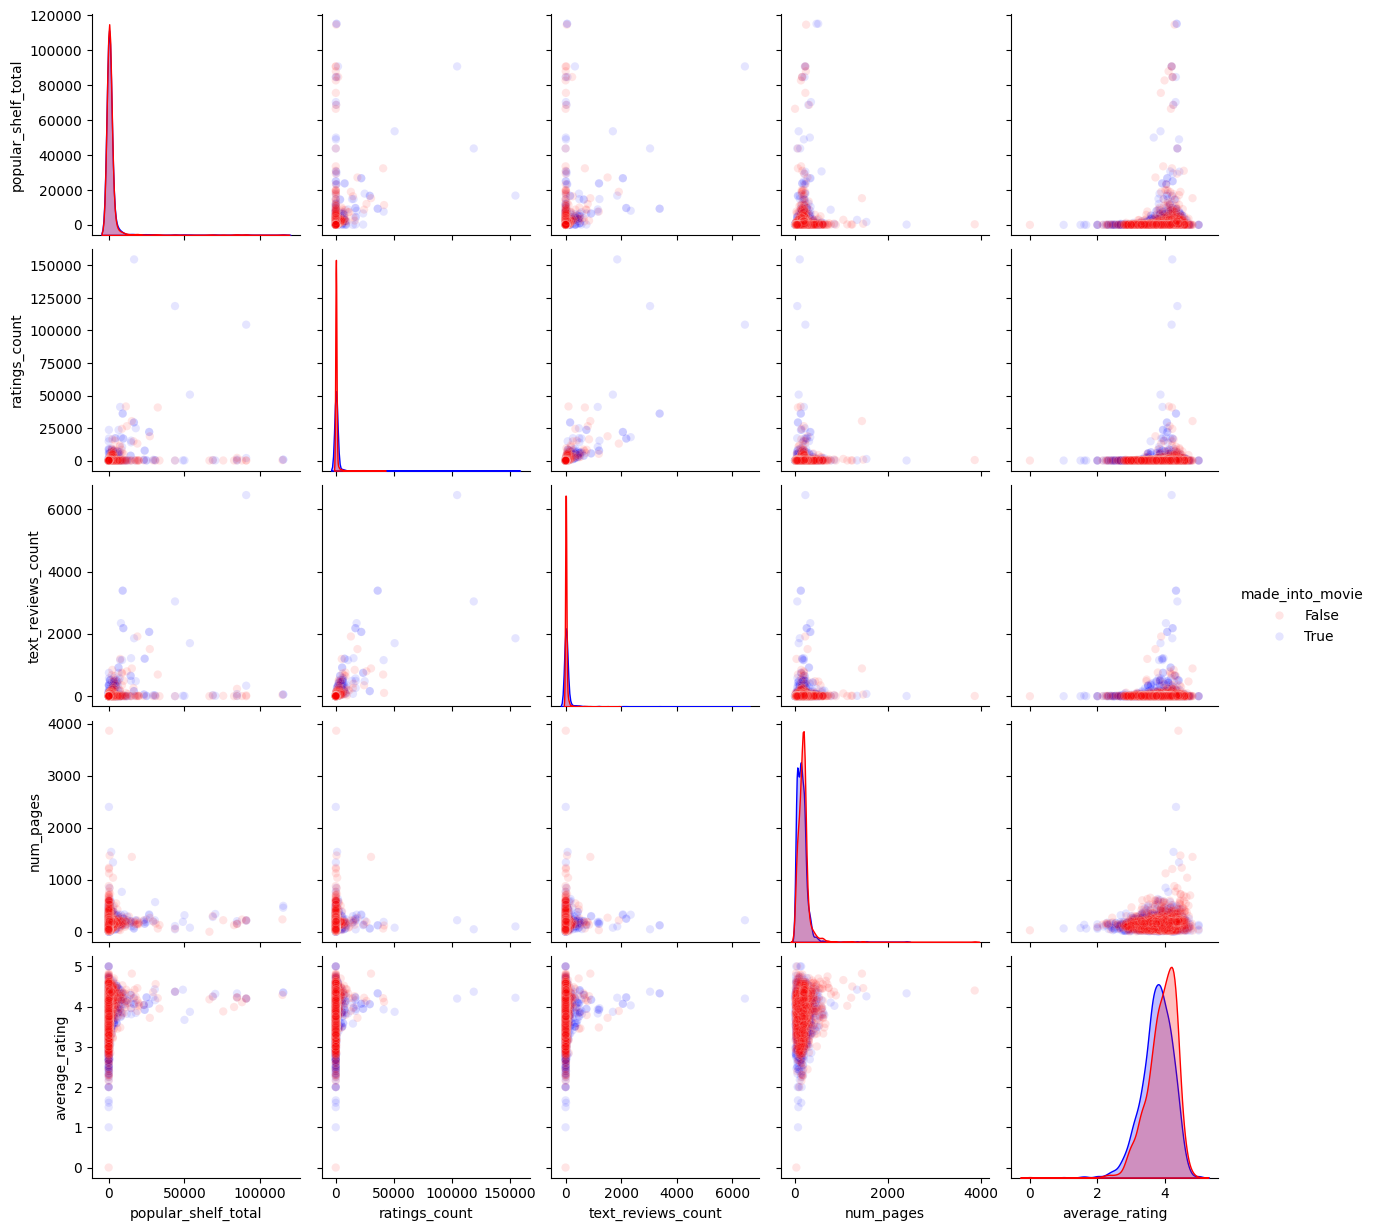

In [ ]:
features_df = ['popular_shelf_total','ratings_count', 'text_reviews_count', 'num_pages','average_rating']
subset_comics_and_graphic_books_df_droped = visualizing_df_pairplot(features_df, comics_and_graphic_books_df_droped)

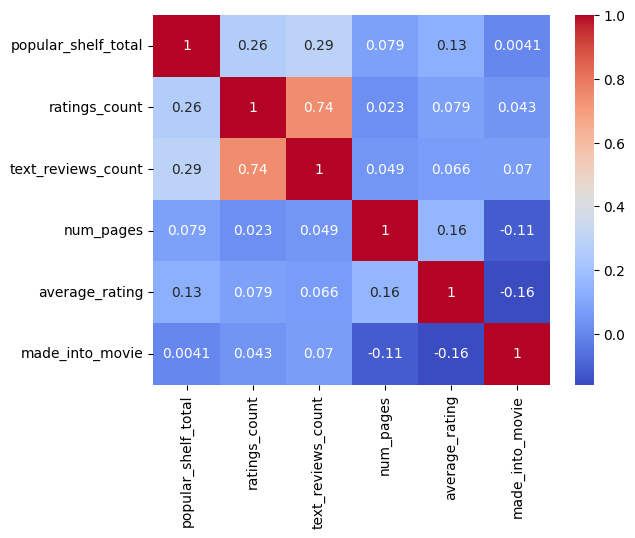

<Figure size 640x480 with 0 Axes>

In [ ]:
corr_matrix = subset_comics_and_graphic_books_df_droped.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()
plt.savefig('seaborn_plot2.png')

### Fantasy and Paranormal Visuals

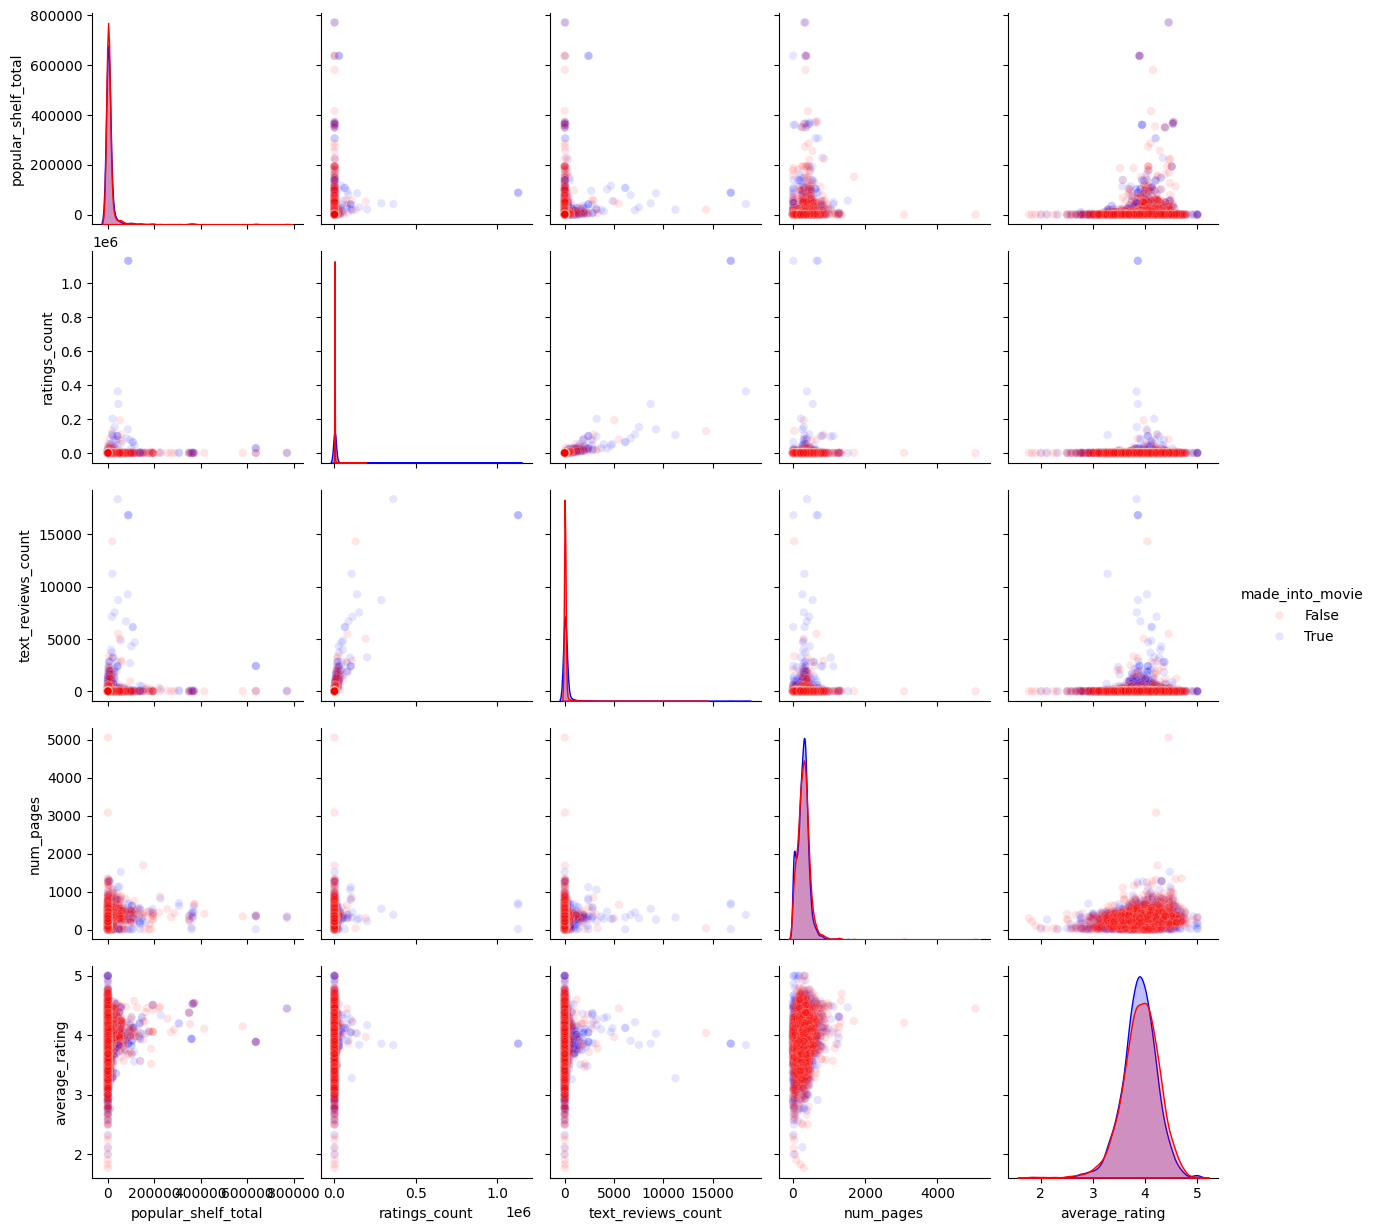

In [ ]:
features_df = ['popular_shelf_total','ratings_count', 'text_reviews_count', 'num_pages','average_rating']
subset_fantasy_paranormal_books_df_droped = visualizing_df_pairplot(features_df, fantasy_paranormal_books_df_droped)

<function matplotlib.pyplot.show(close=None, block=None)>

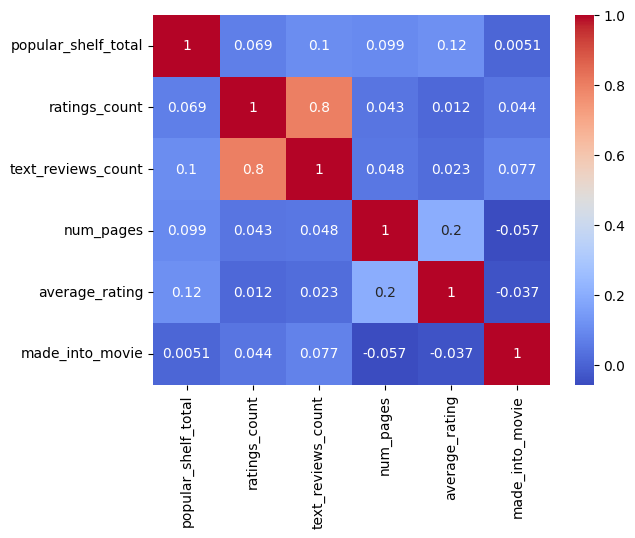

In [ ]:
corr_matrix = subset_fantasy_paranormal_books_df_droped.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show

### History and Biography Visuals

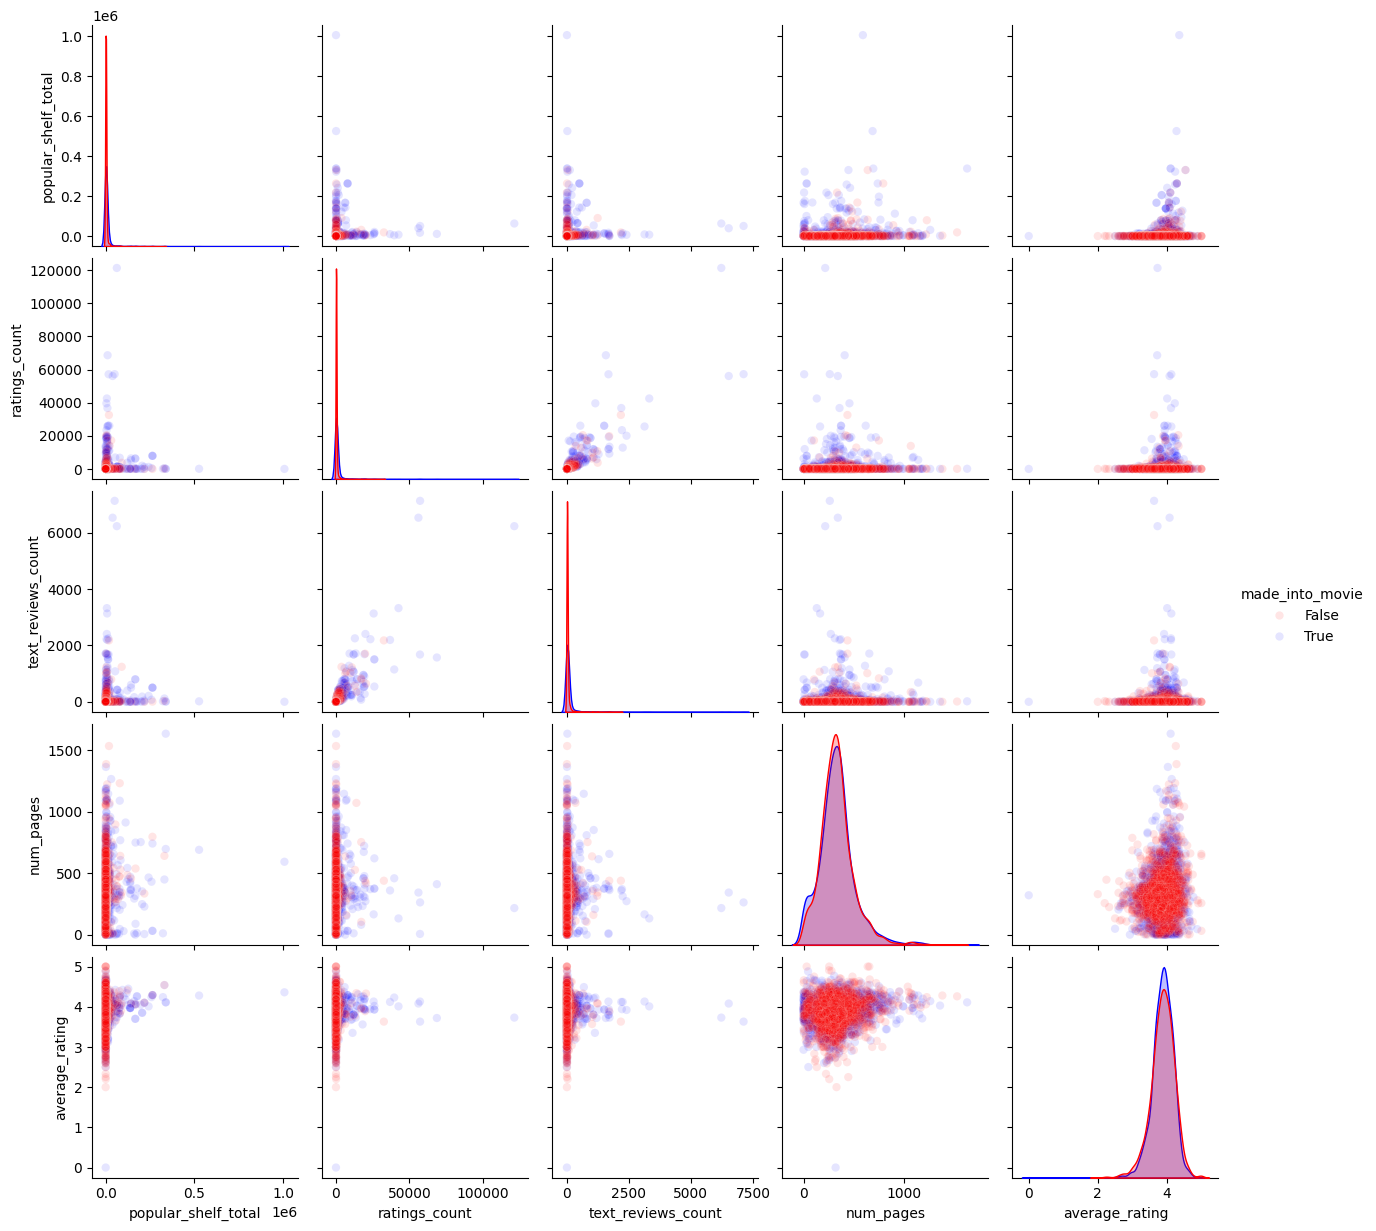

In [ ]:
features_df = ['popular_shelf_total','ratings_count', 'text_reviews_count', 'num_pages','average_rating']
subset_history_bio_books_df_droped = visualizing_df_pairplot(features_df, history_bio_books_df_droped)

<function matplotlib.pyplot.show(close=None, block=None)>

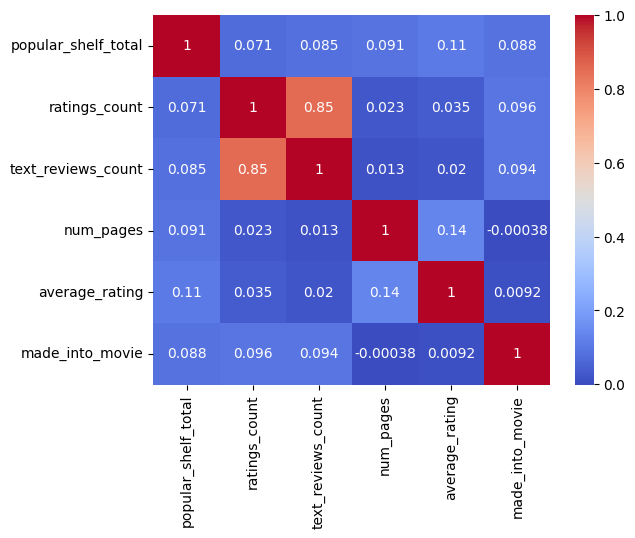

In [ ]:
corr_matrix = subset_history_bio_books_df_droped.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show

### Romance Visuals

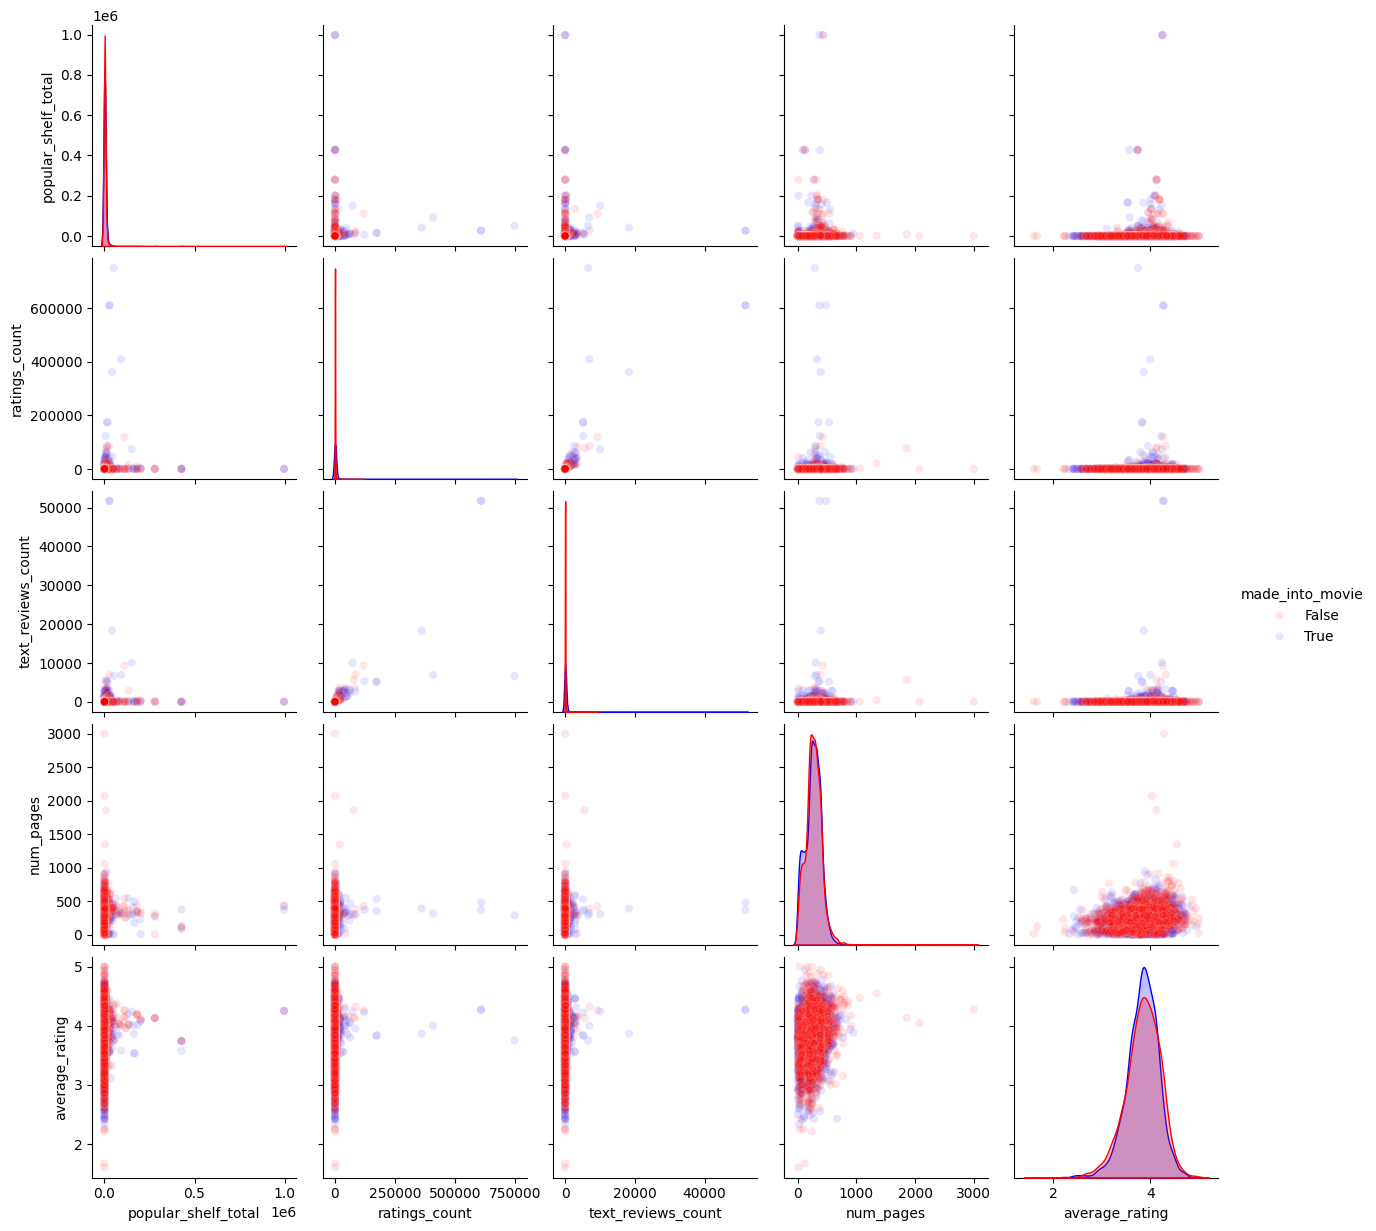

In [ ]:
features_df = ['popular_shelf_total','ratings_count', 'text_reviews_count', 'num_pages','average_rating']
subset_romance_books_df_droped = visualizing_df_pairplot(features_df, romance_books_df_droped)

<function matplotlib.pyplot.show(close=None, block=None)>

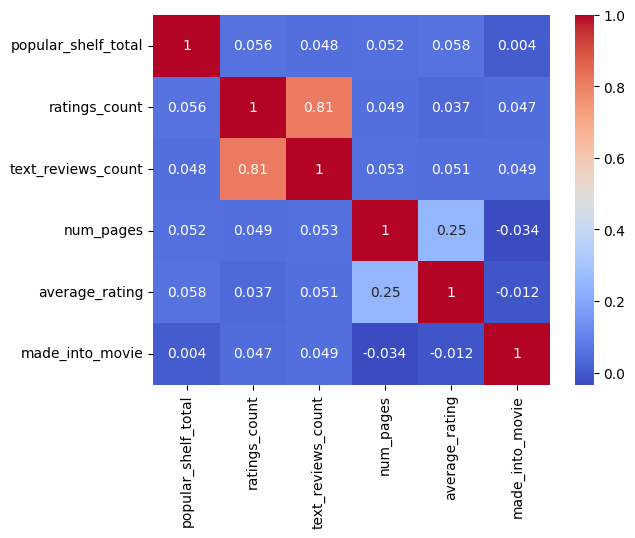

In [ ]:
corr_matrix = subset_romance_books_df_droped.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show

### Mystery and Thriller Visuals

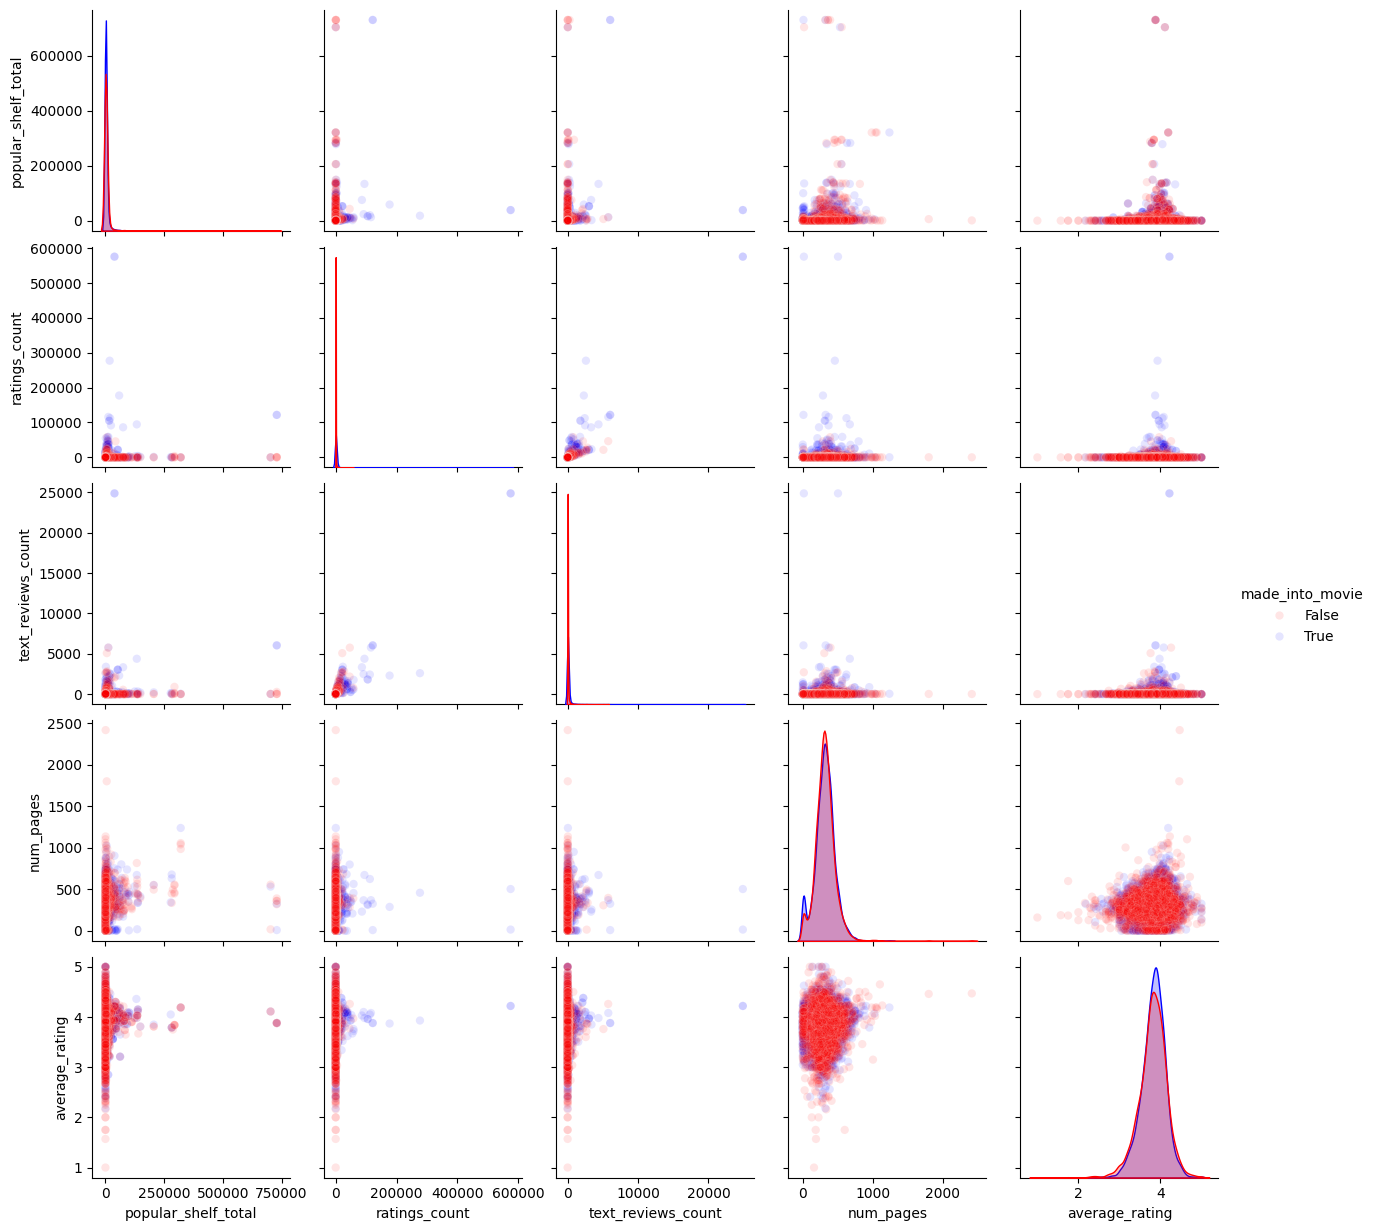

In [ ]:
subset_mist_thrill_books_df_droped = visualizing_df_pairplot(features_df, mist_thrill_books_df_droped)

<function matplotlib.pyplot.show(close=None, block=None)>

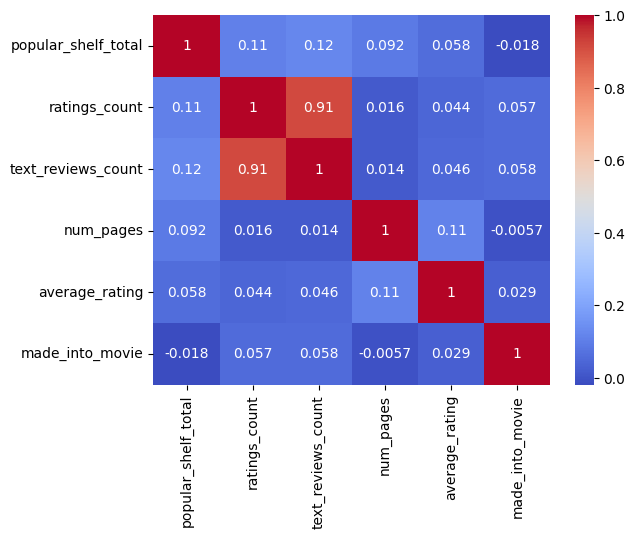

In [ ]:
corr_matrix = subset_mist_thrill_books_df_droped.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show

##Logistic Regression (the Best Model)

In the logisic regression model below, there are a few features that help with increasing recall
- Random Oversampling
- L1
- Cross Validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score

def train_log_reg_l1 (df, name_df):

  X = df.drop(columns=['made_into_movie', 'title', 'matched_movie_title', 'movie_release_date', 'publication_year' ])  # Features
  y = df['made_into_movie']  # Target
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Random oversampling
  oversampler = RandomOverSampler(sampling_strategy='minority')
  X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

  # Custom scoring function for recall
  recall_scorer = make_scorer(recall_score, pos_label=1)  # pos_label=1 specifies the positive class

  # Create logistic regression model with L1 regularization (Lasso)
  #specific weights for each df are given here
  if name_df == "comics and graphics":
    log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced')

  elif name_df == "fantasy and paranormal books":
    class_weights1 = {0: 1, 1: 19}
    log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight=class_weights1)

  elif name_df == "history and biography":
    class_weights1 = {0: 1, 1: 31}
    log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight=class_weights1)

  elif name_df == "romance":
    class_weights1 = {0: 1, 1: 14}
    log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight=class_weights1)

  elif name_df == "mystery and thriller":
    class_weights1 = {0: 1, 1: 12}
    log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', class_weight=class_weights1)

  # Train the model
  log_reg_l1.fit(X_train_over, y_train_over)

  print("for " + name_df + " df------------------------------------------------")

  scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
  }

  # perform cross-validation with multiple scoring metrics
  cv_results = cross_validate( log_reg_l1, X, y, cv=10, scoring=scoring)

  # print the performance metrics for each fold
  for metric, scores in cv_results.items():
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean()}")
    print(f"Standard deviation of {metric}: {scores.std()}")
    print()


### Mystery and Thriller Results

In [ ]:
train_log_reg_l1(mist_thrill_books_df_droped , "mystery and thriller")

for mystery and thriller df------------------------------------------------
Fit_time scores: [0.82021976 0.81707859 0.85831428 0.85889077 1.01439595 0.95332646
 0.49359369 0.81049466 0.38272381 0.83405924]
Mean fit_time: 0.784309720993042
Standard deviation of fit_time: 0.18543365111970095

Score_time scores: [0.02171493 0.02095914 0.02084756 0.02134585 0.02069926 0.02068281
 0.02030754 0.02135801 0.02494884 0.0204215 ]
Mean score_time: 0.021328544616699217
Standard deviation of score_time: 0.0012768284006676102

Test_accuracy scores: [0.3337986  0.33127244 0.30414838 0.32907858 0.31651376 0.34323893
 0.315716   0.33027523 0.29417631 0.30873554]
Mean test_accuracy: 0.3206953769723936
Standard deviation of test_accuracy: 0.014547213355506076

Test_precision scores: [0.0884258  0.09357697 0.08952432 0.09012517 0.08699232 0.08961187
 0.0940194  0.09186789 0.09159906 0.09163987]
Mean test_precision: 0.09073826555454174
Standard deviation of test_precision: 0.002101235527463353

Test_recall

### Romance Results

In [ ]:
train_log_reg_l1(romance_books_df_droped , "romance")

for romance df------------------------------------------------
Fit_time scores: [0.36297178 0.61113143 0.74844074 0.45553946 0.64701462 0.875561
 0.6683352  0.79952502 0.48581767 0.40605235]
Mean fit_time: 0.6060389280319214
Standard deviation of fit_time: 0.16496137898930505

Score_time scores: [0.02210093 0.04317093 0.04652238 0.04028702 0.04690814 0.04168415
 0.04760337 0.01954126 0.0200119  0.02113271]
Mean score_time: 0.03489627838134766
Standard deviation of score_time: 0.011811030393608696

Test_accuracy scores: [0.33898664 0.31658185 0.29304495 0.30428329 0.29389313 0.29919423
 0.31679389 0.30640373 0.31000848 0.28859203]
Mean test_accuracy: 0.3067782233536036
Standard deviation of test_accuracy: 0.014119099034325554

Test_precision scores: [0.0808356  0.07930934 0.08087616 0.07825086 0.07931132 0.0815402
 0.08398494 0.08161512 0.08080808 0.0801676 ]
Mean test_precision: 0.08066992225366168
Standard deviation of test_precision: 0.0015010125297549256

Test_recall scores: [0.7650

###History and Biography Results

In [ ]:
train_log_reg_l1(history_bio_books_df_droped, "history and biography")

for history and biography df------------------------------------------------
Fit_time scores: [0.70897198 0.2724781  0.44459033 0.36303401 0.72147584 0.48665142
 0.45513034 0.66837192 0.1363523  0.08778691]
Mean fit_time: 0.4344843149185181
Standard deviation of fit_time: 0.21356351834638515

Score_time scores: [0.02290821 0.02350402 0.02223253 0.0240891  0.02782416 0.02673101
 0.02842951 0.02211452 0.02434802 0.02292967]
Mean score_time: 0.024511075019836424
Standard deviation of score_time: 0.0022018831146066375

Test_accuracy scores: [0.37532552 0.29052734 0.22753906 0.26436594 0.33355038 0.33745727
 0.3433176  0.31255087 0.28585382 0.31010907]
Mean test_accuracy: 0.3080596875805456
Standard deviation of test_accuracy: 0.04061942201954395

Test_precision scores: [0.04143507 0.03578618 0.03580196 0.03674259 0.03737205 0.03758678
 0.03858211 0.03902663 0.03924162 0.0388927 ]
Mean test_precision: 0.03804676978242809
Standard deviation of test_precision: 0.00165492305128292

Test_recall

### Comics and Graphics Results

In [ ]:
train_log_reg_l1(comics_and_graphic_books_df_droped, "comics and graphics")

for comics and graphics df------------------------------------------------
Fit_time scores: [0.76457214 1.07301378 1.03142834 1.52196288 1.5644784  1.16758108
 0.7916975  1.0837338  0.99343586 1.12230587]
Mean fit_time: 1.1114209651947022
Standard deviation of fit_time: 0.24943262334679586

Score_time scores: [0.02296329 0.02151251 0.04492974 0.03043747 0.05215406 0.02573228
 0.02582979 0.02206111 0.02602363 0.02241135]
Mean score_time: 0.02940552234649658
Standard deviation of score_time: 0.010019676936612812

Test_accuracy scores: [0.60730594 0.60527651 0.61356334 0.61745307 0.60984272 0.6042618
 0.60273973 0.59394554 0.60138677 0.61096076]
Mean test_accuracy: 0.6066736167894095
Standard deviation of test_accuracy: 0.006369350528793478

Test_precision scores: [0.04771959 0.04441624 0.0477009  0.04778454 0.05221053 0.04391892
 0.04259806 0.04469045 0.04625    0.04543506]
Mean test_precision: 0.04627242900669719
Standard deviation of test_precision: 0.0025956129381449738

Test_recall s

### Fantasy and Paranormal Results

In [ ]:
train_log_reg_l1(fantasy_paranormal_books_df_droped, "fantasy and paranormal books")

for fantasy and paranormal books df------------------------------------------------
Fit_time scores: [1.06188965 0.75127578 1.02187443 1.11074519 1.44942856 1.23868442
 1.37140536 0.69680738 0.53940153 0.3938663 ]
Mean fit_time: 0.9635378599166871
Standard deviation of fit_time: 0.33667717103928885

Score_time scores: [0.02092886 0.02083516 0.02111626 0.02084637 0.02142859 0.04419422
 0.02637601 0.02161193 0.02101135 0.02097511]
Mean score_time: 0.023932385444641113
Standard deviation of score_time: 0.0069391122015271525

Test_accuracy scores: [0.45098039 0.43980392 0.44616591 0.44047853 0.44616591 0.4459698
 0.45342224 0.45734458 0.43479114 0.43616395]
Mean test_accuracy: 0.445128637295279
Standard deviation of test_accuracy: 0.0070165600018679344

Test_precision scores: [0.06510506 0.06443995 0.06632653 0.06538591 0.06305689 0.06952413
 0.0653753  0.06186292 0.06823451 0.06140351]
Mean test_precision: 0.06507147148559325
Standard deviation of test_precision: 0.0024454988551475035

Te

## other models with really poor recall
(these were tested with the comic and graphic set and were disregarded because of their poor recall)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score

X = comics_and_graphic_books_df_droped.drop(columns=['made_into_movie', 'title', 'matched_movie_title', 'movie_release_date', 'publication_year' ])  # Features
y = comics_and_graphic_books_df_droped['made_into_movie']  # Target

# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Define custom scoring function for recall
recall_scorer = make_scorer(recall_score)

# Perform cross-validation with recall as the scoring metric
cv_scores_recall = cross_val_score(rf_classifier, X, y, cv=10, scoring=recall_scorer)

# Print cross-validation scores for recall
print("Cross-validation scores (recall):", cv_scores_recall)

# Print mean and standard deviation of cross-validation scores for recall
print("Mean CV recall:", cv_scores_recall.mean())
print("Standard deviation of CV recall:", cv_scores_recall.std())

Cross-validation scores (recall): [0.01666667 0.06111111 0.03333333 0.03888889 0.03888889 0.03888889
 0.05       0.05       0.03910615 0.02793296]
Mean CV recall: 0.03948168839230291
Standard deviation of CV recall: 0.011755839165335565


###Karas Sequential Neural Network

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

X = comics_and_graphic_books_df_droped.drop(columns=['made_into_movie', 'title', 'matched_movie_title', 'movie_release_date', 'publication_year' ])  # Features


X = X.astype('float64')

y = comics_and_graphic_books_df_droped['made_into_movie']  # Target variable

# Encoding target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')


Epoch 1/10
1183/1183 [==============================] - 4s 2ms/step - loss: 2.6260 - accuracy: 0.9567 - val_loss: 2.4210 - val_accuracy: 0.9697
Epoch 2/10
1183/1183 [==============================] - 4s 3ms/step - loss: 2.7704 - accuracy: 0.9605 - val_loss: 0.5573 - val_accuracy: 0.9528
Epoch 3/10
1183/1183 [==============================] - 3s 3ms/step - loss: 1.2265 - accuracy: 0.9624 - val_loss: 0.4490 - val_accuracy: 0.9682
Epoch 4/10
1183/1183 [==============================] - 3s 3ms/step - loss: 0.7261 - accuracy: 0.9647 - val_loss: 0.5521 - val_accuracy: 0.9698
Epoch 5/10
1183/1183 [==============================] - 3s 2ms/step - loss: 0.7235 - accuracy: 0.9627 - val_loss: 0.3760 - val_accuracy: 0.9692
Epoch 6/10
1183/1183 [==============================] - 3s 3ms/step - loss: 0.2080 - accuracy: 0.9695 - val_loss: 0.1638 - val_accuracy: 0.9701
Epoch 7/10
1183/1183 [==============================] - 4s 3ms/step - loss: 0.1540 - accuracy: 0.9692 - val_loss: 0.1413 - val_accuracy:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense


y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# calculate the recall
recall = recall_score(y_test, y_pred_classes)

print(f'Recall: {recall}')

370/370 [==============================] - 1s 1ms/step
Recall: 0.0


### LasoCV

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature matrix and target vector
X = comics_and_graphic_books_df_droped[['popular_shelf_total', 'ratings_count', 'text_reviews_count', 'num_pages', 'average_rating']]
y = comics_and_graphic_books_df_droped['made_into_movie']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate LassoCV with cross-validation
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1, 10], cv=5)

# Fit the model to the training data
lasso_cv.fit(X_train, y_train)

# Access the best alpha value found during cross-validation
best_alpha = lasso_cv.alpha_

# Make predictions on the testing set
y_pred = lasso_cv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Convert predicted probabilities to binary predictions (0 or 1) based on a threshold
threshold = 0.5  # Adjust threshold as needed
binary_predictions = (y_pred >= threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, binary_predictions)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, binary_predictions))

Accuracy: 0.9694740402502959
Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98     11465
        True       0.00      0.00      0.00       361

    accuracy                           0.97     11826
   macro avg       0.48      0.50      0.49     11826
weighted avg       0.94      0.97      0.95     11826

Confusion Matrix:
[[11465     0]
 [  361     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Third Dataset: Books Sales and Ratings
###(https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings)

We wanted to look at this dataset because it had a lot of features which we thought could reveal some important insights.

Important features we examine in the dataset:
* Author rating - the rating assigned to the author based on their previous books
* Book average rating
* Book ratings count
* Genre
* Gross sales
* Sale price
* Sale rank - a number indicating a book's rank based on its sales performance in comparison to other books in its genre
* Units sold
* Book name

## Setting up the data

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the datasets

def remove_parentheses(text):
    """Removes parantheses and everything inside them from a string"""
    return text.str.replace(r'\(.*?\)', '', regex=True)

# Same movie DataFrame as before
path = '/content/drive/MyDrive/BigDataFinal/Movies Dataset/movies_metadata.csv'
movies_df = pd.read_csv(path)

# Normalize and clean titles in movies_df
movies_df['normalized_title'] = remove_parentheses(
    movies_df['title'].str.lower()).replace('[^\w\s]', '', regex=True)
movies_dict = movies_df.set_index('normalized_title')['title'].to_dict()

# Loading Books Sales and Ratings dataset
path = '/content/drive/MyDrive/BigDataFinal/books_morecols.csv'
books_df = pd.read_csv(path)

# Clean column titles of books_df to all be consistent and drop irrelevant columns
books_df.rename(lambda x: x.lower(), axis=1, inplace=True)
books_df.rename(lambda x: x.replace(' ', '_'), axis=1, inplace=True)
books_df.rename(columns={'publisher_':'publisher','book_name':'title',
                         'book_average_rating':'average_rating',
                         'book_ratings_count':'ratings_count',
                         'author_rating':'author_score','index':'bookID'},
                         inplace=True)
books_df.head()

<ipython-input-4-1c536ad8f127>:5: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(path)


bookID  publishing_year                            title  \
0       0           1975.0                          Beowulf   
1       1           1987.0                 Batman: Year One   
2       2           2015.0                Go Set a Watchman   
3       3           2008.0  When You Are Engulfed in Flames   
4       4           2011.0         Daughter of Smoke & Bone   

                                              author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

   author_score  average_rating  ratings_count          genre  gross_sales  \
0        Novice            3.42         155903  genre fiction      34160.0   
1  Intermediate            4.23         145267  genre fiction      12437.5   
2        Novice            3.31         138669  genre fiction      47795.0   
3  Intermediate            4.04         150898        fiction      41250.0   
4  Intermediate            4.04         198283  genre fiction      37952.5   

   publisher_revenue  sale_price  sales_rank                       publisher  \
0            20496.0        4.88           1        HarperCollins Publishers   
1             7462.5        1.99           2        HarperCollins Publishers   
2            28677.0        8.69           3  Amazon Digital Services,  Inc.   
3            24750.0        7.50           3             Hachette Book Group   
4            22771.5        7.99           4         Penguin Group (USA) LLC   

   units_sold  
0        7000  
1        6250  
2        5500  
3        5500  
4        4750

In [ ]:
import pandas as pd
!pip install rapidfuzz
from rapidfuzz import process, fuzz
from concurrent.futures import ProcessPoolExecutor

# Function to perform matching
def match_title(book_title):
    best_match = process.extractOne(book_title, movies_dict.keys(),
                                    scorer=fuzz.token_sort_ratio,
                                    score_cutoff=90)
    if best_match:
        return (movies_dict[best_match[0]], best_match[1])
    return (None, None)


def clean_match(df, date_column_name):
    """
    normalizes and cleans the titles in the df and matches the titles to
    the movie df we are using to verify if a book is made into a movie
    and then gives a score for how much a movie title matches with the
    corresponding book title
    df: book df
    date_column_name: name of date column in dataframe
    colmn_to_drop_matches: name of column used to drop repeates in dataset
    returns: df (normalized_title, matched_movie_title,
        and match_score columns added)
    """
    df['normalized_title'] = remove_parentheses(df['title'].str.lower()).replace('[^\w\s]', '', regex=True)
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(match_title, df['normalized_title']))

    matched_titles, scores = zip(*results)
    df['matched_movie_title'], df['match_score'] = matched_titles, scores
    book_df_dates = df.merge(movies_df[['title', date_column_name]], left_on='matched_movie_title', right_on='title', how='left')

    return book_df_dates

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 24.5 MB/s eta 0:00:00


In [ ]:
df = clean_match(books_df,'release_date')

# Further clean dataframe
# A concern here is the movie release date, one date will be dropped and unclear if it will always be earliest/latest one
# Will need to look into if using release dates
df.drop_duplicates(subset='bookID', keep='first',inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(columns=['title_y'], inplace=True)
df.rename(columns={'title_x': 'title'}, inplace=True)
df.head()

bookID  publishing_year                            title  \
0       0           1975.0                          Beowulf   
1       1           1987.0                 Batman: Year One   
2       2           2015.0                Go Set a Watchman   
3       3           2008.0  When You Are Engulfed in Flames   
4       4           2011.0         Daughter of Smoke & Bone   

                                              author language_code  \
0                             Unknown, Seamus Heaney         en-US   
1  Frank Miller, David Mazzucchelli, Richmond Lew...           eng   
2                                         Harper Lee           eng   
3                                      David Sedaris         en-US   
4                                       Laini Taylor           eng   

   author_score  average_rating  ratings_count          genre  gross_sales  \
0        Novice            3.42         155903  genre fiction      34160.0   
1  Intermediate            4.23         145267  genre fiction      12437.5   
2        Novice            3.31         138669  genre fiction      47795.0   
3  Intermediate            4.04         150898        fiction      41250.0   
4  Intermediate            4.04         198283  genre fiction      37952.5   

   publisher_revenue  sale_price  sales_rank                       publisher  \
0            20496.0        4.88           1        HarperCollins Publishers   
1             7462.5        1.99           2        HarperCollins Publishers   
2            28677.0        8.69           3  Amazon Digital Services,  Inc.   
3            24750.0        7.50           3             Hachette Book Group   
4            22771.5        7.99           4         Penguin Group (USA) LLC   

   units_sold                 normalized_title matched_movie_title  \
0        7000                          beowulf             Beowulf   
1        6250                  batman year one    Batman: Year One   
2        5500                go set a watchman                None   
3        5500  when you are engulfed in flames                None   
4        4750          daughter of smoke  bone                None   

   match_score release_date  
0        100.0   1999-04-01  
1        100.0   2011-09-27  
2          NaN          NaN  
3          NaN          NaN  
4          NaN          NaN

In [ ]:
# Examine matches with uncertain scores
df[df['match_score']<100][['bookID','title','normalized_title',
                           'matched_movie_title','match_score','author',
                           'release_date']]

bookID                                  title  \
32        32                              Club Dead   
50        50                                Scarlet   
53        53                          The Magicians   
167      167            The Silver Linings Playbook   
228      228                             Bloodlines   
250      250                               Specials   
351      351                           Storm Island   
367      367                The Queen of the Damned   
416      416                              Angelfall   
450      450                            Blue Bloods   
526      526                          The Testament   
553      553                     To The Lighthouse    
564      564                     Life As We Knew It   
570      570                        Change of Heart   
596      596                          Summer Knight   
597      597                           Dragonflight   
682      682                   Children of the Mind   
713      713                            Wintergirls   
765      765                          State of Fear   
770      770                             The Broker   
812      812                    The Light Fantastic   
946      946                            Bleak House   
960      960                             The Strain   
1012    1012                          The Racketeer   
1052    1052       Nick & Norah's Infinite Playlist   
1053    1053  Rosencrantz and Guildenstern are Dead   
1062    1062                               Magician   

                           normalized_title  \
32                                club dead   
50                                  scarlet   
53                            the magicians   
167             the silver linings playbook   
228                              bloodlines   
250                                specials   
351                            storm island   
367                 the queen of the damned   
416                               angelfall   
450                             blue bloods   
526                           the testament   
553                      to the lighthouse    
564                      life as we knew it   
570                         change of heart   
596                           summer knight   
597                            dragonflight   
682                    children of the mind   
713                             wintergirls   
765                           state of fear   
770                              the broker   
812                     the light fantastic   
946                             bleak house   
960                              the strain   
1012                          the racketeer   
1052         nick  norahs infinite playlist   
1053  rosencrantz and guildenstern are dead   
1062                               magician   

                      matched_movie_title  match_score  \
32                             Club Dread    94.736842   
50                               Scarlett    93.333333   
53                           The Magician    96.000000   
167               Silver Linings Playbook    92.000000   
228                             Bloodline    94.736842   
250                               Special    93.333333   
351                            Sand Storm    90.909091   
367                   Queen of the Damned    90.476190   
416                          Angel's Fall    90.000000   
450                            Blue Blood    95.238095   
526                        The Testaments    96.296296   
553                        The Lighthouse    90.322581   
564                    Life As We Know It    94.444444   
570                     A Change of Heart    93.750000   
596                          Summer Night    96.000000   
597                          Dragon Fight    91.666667   
682                Children of the Damned    90.476190   
713                             Intergirl    90.000000   
765                         Taste of Fear    9

In [ ]:
# Most matches with scores below 100 aren't true matches, define bookID's of the few that are
correct = [167, 367, 1052, 1053]

In [ ]:
# Confirming that match scores of 100 look good
df[df['match_score']==100][['bookID','title','normalized_title',
                           'matched_movie_title','match_score','author',
                           'release_date']]

bookID                                    title  \
0          0                                  Beowulf   
1          1                         Batman: Year One   
7          7  Midnight in the Garden of Good and Evil   
9          9                        A Little Princess   
14        14                     The Velveteen Rabbit   
...      ...                                      ...   
1054    1054                                  Forever   
1055    1055                                The Beach   
1059    1059                        Beezus and Ramona   
1066    1066                         The Power of One   
1067    1067                       The Maltese Falcon   

                             normalized_title  \
0                                     beowulf   
1                             batman year one   
7     midnight in the garden of good and evil   
9                           a little princess   
14                       the velveteen rabbit   
...                                       ...   
1054                                  forever   
1055                                the beach   
1059                        beezus and ramona   
1066                         the power of one   
1067                       the maltese falcon   

                          matched_movie_title  match_score  \
0                                     Beowulf        100.0   
1                            Batman: Year One        100.0   
7     Midnight in the Garden of Good and Evil        100.0   
9                           A Little Princess        100.0   
14                       The Velveteen Rabbit        100.0   
...                                       ...          ...   
1054                                  Forever        100.0   
1055                                The Beach        100.0   
1059                        Ramona and Beezus        100.0   
1066                         The Power of One        100.0   
1067                       The Maltese Falcon        100.0   

                                                 author release_date  
0                                Unknown, Seamus Heaney   1999-04-01  
1     Frank Miller, David Mazzucchelli, Richmond Lew...   2011-09-27  
7                                          John Berendt   1997-11-21  
9                   Frances Hodgson Burnett, Nancy Bond   1995-05-10  
14         Margery Williams Bianco, William   Nicholson   2009-01-01  
...                                                 ...          ...  
1054                                  Maggie Stiefvater   2006-10-05  
1055                                       Alex Garland   2000-02-11  
1059                                     Beverly Cleary   2010-07-23  
1066                                    Bryce Courtenay   1992-09-17  
1067                                   Dashiell Hammett   1941-11-18  

[253 rows x 7 columns]

In [ ]:
# Make mask for locating books that don't have movies
mask = (df['match_score']<100) & (~df['bookID'].isin(correct))
df.loc[mask, 'matched_movie_title'] = None

# Create the "Made into Movie" column
df['made_into_movie'] = df['matched_movie_title'].notna()

# Rename 'release_date' to 'movie_release_date' for clarity
df.rename(columns={'release_date': 'movie_release_date'}, inplace=True)

# Drop the 'matched_book_title' column as it's no longer necessary
df.drop(columns=['matched_movie_title','normalized_title','match_score'],
        inplace=True)

# Make `author_score` numeric for analysis
rating_map = {'Intermediate':1, 'Excellent':2,'Famous':3, 'Novice':0}
df['author_score'] = df['author_score'].map(rating_map)

# Clean the genre column so that none say 'genre' in it
df['genre'] = df['genre'].map(lambda x: x.replace('genre','').strip())

## Data Exploration

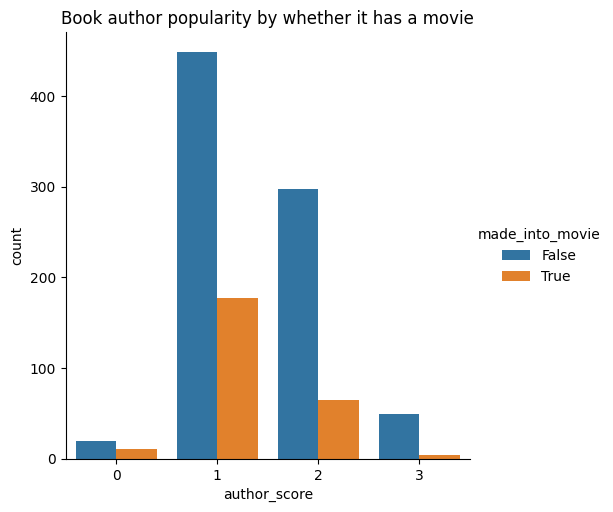

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

grouped_score = pd.DataFrame(df[['author_score','made_into_movie']].value_counts())

# Visualize whether author popularity appears to influence if book is made into movie
sns.catplot(data=grouped_score, kind='bar',x='author_score',y='count',hue='made_into_movie')
plt.title('Book author popularity by whether it has a movie');

# It looks like both normal books and books that have movies follow the same trend with author popularity

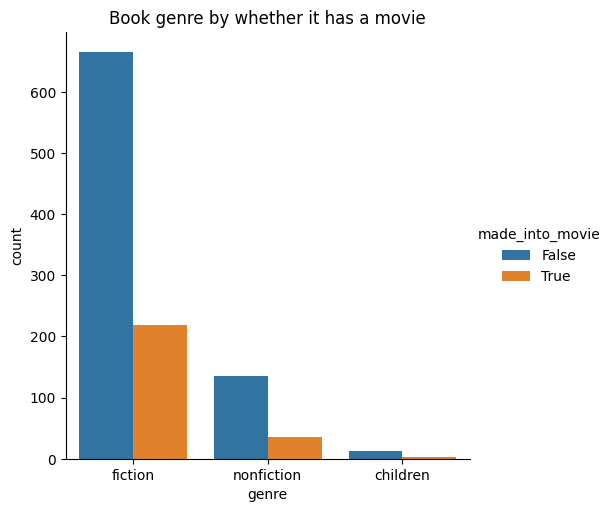

In [ ]:
grouped_genre = pd.DataFrame(df[['genre','made_into_movie']].value_counts())

# Visualize if there are trends with genre and whether the book is made into movie
sns.catplot(data=grouped_genre, kind='bar',x='genre',y='count',hue='made_into_movie')
plt.title('Book genre by whether it has a movie');

# It looks like both normal books and books that have movies follow the same trend with genre.
# However, it is important to note that this dataset is very limited in genre categories.

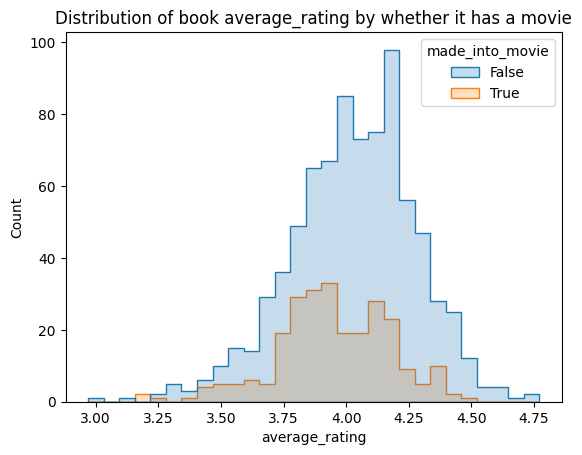

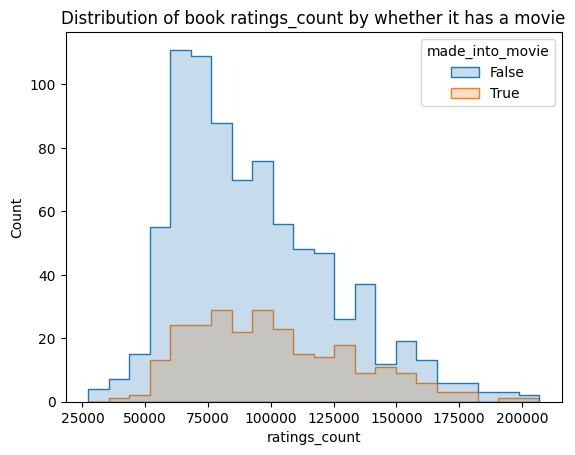

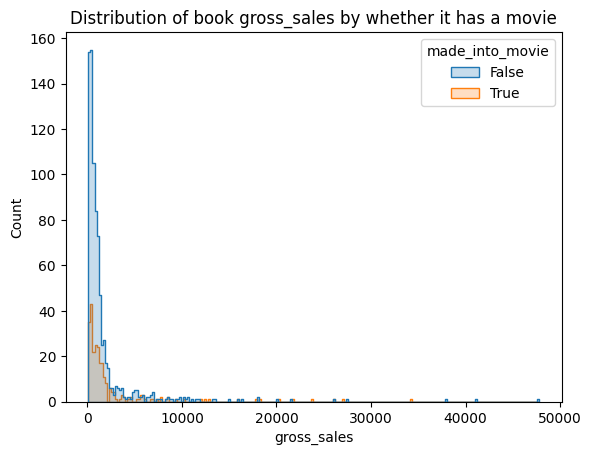

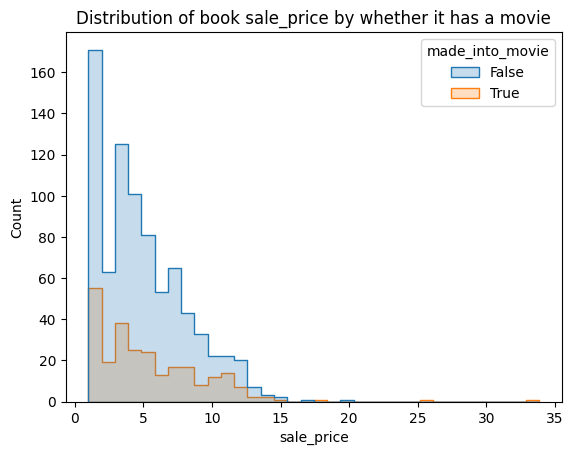

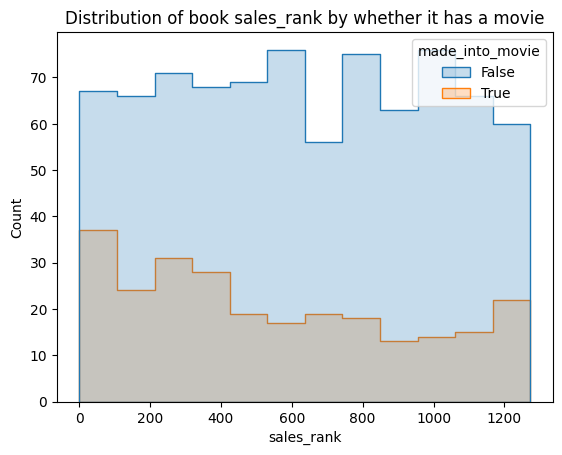

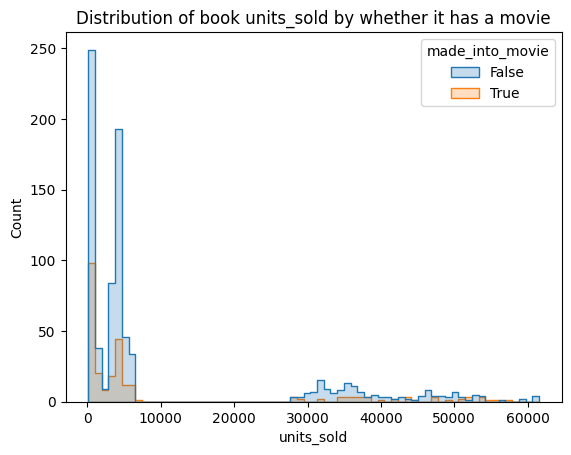

In [ ]:
# Visualize general distributions of features to see if books made into movies stand out
features = ['average_rating','ratings_count',
            'gross_sales', 'sale_price', 'sales_rank',
            'units_sold']
for feature in features:
    sns.histplot(data=df, x=feature, hue='made_into_movie',element='step')
    plt.title(f'Distribution of book {feature} by whether it has a movie')
    plt.show()

# In general, the distributions are pretty similar with the only difference being that there are more books that don't have movies.

Text(0.5, 1.0, 'Distribution of gross_sales by whether or not it has a movie')

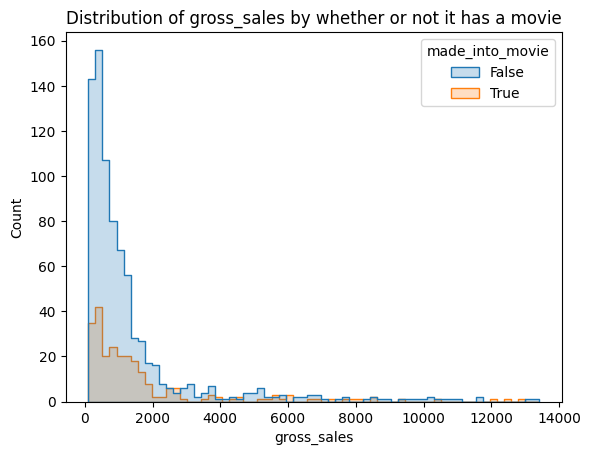

In [ ]:
from scipy import stats

# Get a better visualization of `gross_sales` without outliers
z_scores = stats.zscore(df['gross_sales'])
no_outliers = df[['gross_sales','made_into_movie']][(z_scores > -3) & (z_scores < 3)]
sns.histplot(data=no_outliers, x='gross_sales', hue='made_into_movie',element='step')
plt.title('Distribution of gross_sales by whether or not it has a movie')

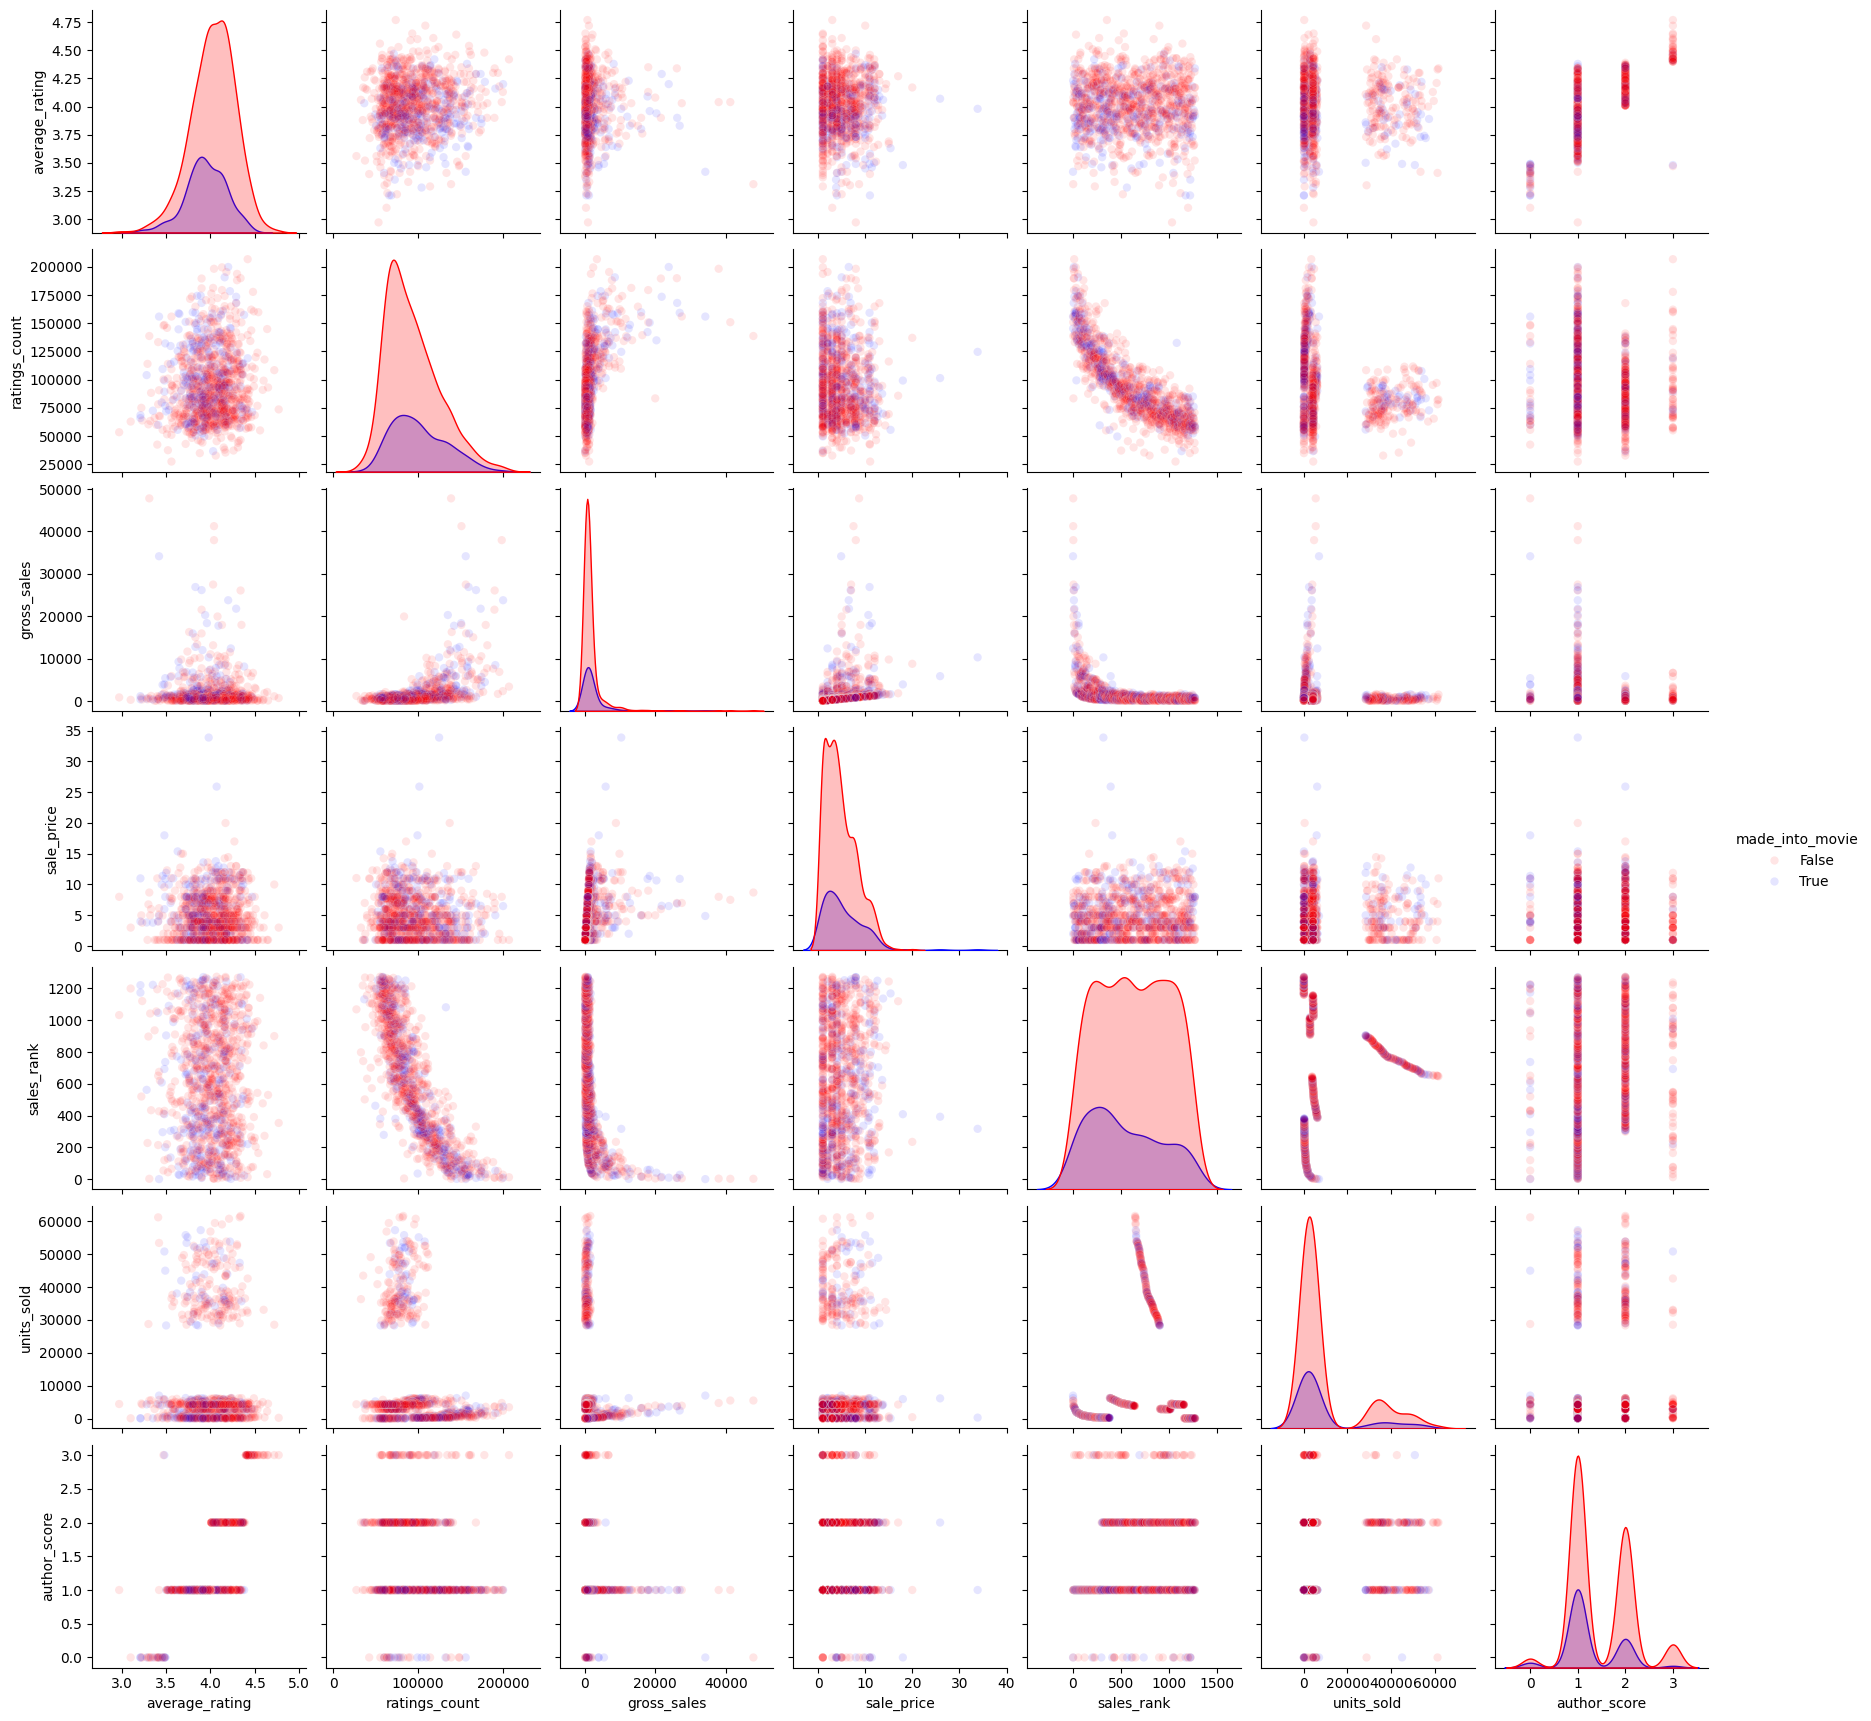

In [ ]:
# Visualize different relationships with a pairplot

# Create a subset DataFrame with only the selected features
features = ['average_rating','ratings_count',
            'gross_sales', 'sale_price', 'sales_rank', 'units_sold',
            'author_score']
subset_df = df[features + ['made_into_movie']]

sns.pairplot(subset_df, hue='made_into_movie',
             palette={True: 'blue', False: 'red'},plot_kws={'alpha':0.1})

# We still see fairly similar trends between books with movies and books without.
# We see that as sales_rank increases, ratings_count decreases.
# This negative correlation is a little surprising as we originally expected the opposite.
# However, this may be explained by the fact that books that perform worse may have a lot of bad ratings.
# We also see that as author_score increases, average_rating increases which
# makes sense because an author's rating is dependent on how their books perform.

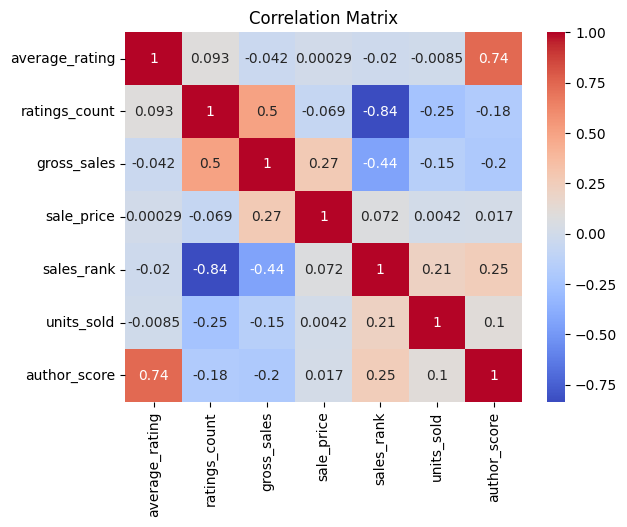

In [ ]:
# Create a correlation between features to examine collinearities
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# There is a strong negative correlation between sales_rank and ratings_count.
# There is also a strong correlation between author_score and average_rating
# which makes sense because an author that gets good ratings would have a higher rating.

In [ ]:
# Use Point-Biserial Correlation to examine correlation between features and binary made_into_movie
features = ['average_rating','ratings_count',
            'gross_sales', 'sale_price', 'units_sold']
for feature in features:
    corr, p = stats.pointbiserialr(df['made_into_movie'],df[feature])
    print(f'Correlation between made_into_movie and {feature}: {corr}')

# All of these correlations are very low which is not promising.

Correlation between made_into_movie and average_rating: -0.13968351063513973
Correlation between made_into_movie and ratings_count: 0.10290188152881392
Correlation between made_into_movie and gross_sales: 0.07809311733918169
Correlation between made_into_movie and sale_price: 0.06410336135968121
Correlation between made_into_movie and units_sold: -0.02658952231374899


In [ ]:
# Look at Spearman Correlation for the ordinal features
features = ['sales_rank','author_score']
for feature in features:
    corr, p = stats.spearmanr(df['made_into_movie'],df[feature])
    print(f'Correlation between made_into_movie and {feature}: {corr}')

# These correlations are also pretty low.

Correlation between made_into_movie and sales_rank: -0.10023712489192413
Correlation between made_into_movie and author_score: -0.14763147504603816


Text(0.5, 1.0, 'PCA: First two principle components')

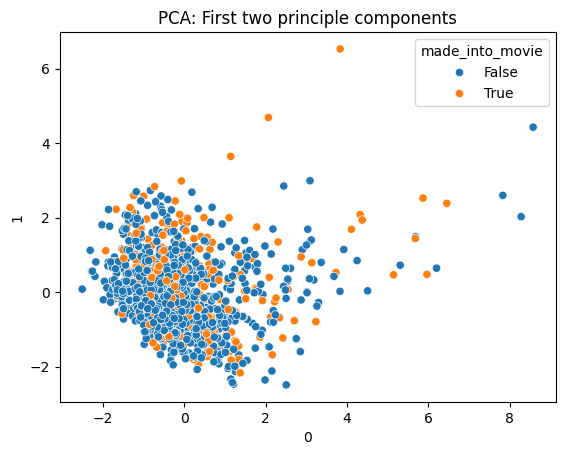

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Perform PCA to see if we can gain insight from dimensionality reduction
features = ['average_rating','ratings_count','gross_sales', 'sale_price',
            'units_sold']
X = df[features]
y = df['made_into_movie']
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
PCA_data = pca.fit_transform(X,y)
df_pca = pd.DataFrame(PCA_data)
sns.scatterplot(data=df_pca, x=0, y=1,hue=df['made_into_movie'])
plt.title('PCA: First two principle components')

# Our PCA failed to separate books with movies and those without, which isn't very surprising given the lack of observed trends and small amount of data.

## Models

Despite struggling to see trends or separation within the data, we are going to see if a model is able to distinguish the data better. Based on previous performance, we believe a Logistic Regression model is the best choice for this dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

# Prepare data for model
features = ['average_rating','ratings_count','gross_sales', 'sale_price',
            'units_sold','author_score']

X = df[features]
y = df['made_into_movie']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=3)

# Normalize train and test data so columns are on the same scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)
print(f'Train Accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')
print(f'Train Recall: {recall_score(y_train, y_pred_train)}')
print(f'Test Recall: {recall_score(y_test, y_pred_test)}')
print(f'Train Precision: {precision_score(y_train, y_pred_train)}')
print(f'Test Precision: {precision_score(y_test, y_pred_test)}')

# The accuracy is very high but this is only because there are way more books that don't have movies.
# Since there are so many more negatives than positives, a high accuracy could just mean that the model easily predicted negatives by chance.
# Our goal is to increase the recall because we want to maximize how many true positives we predict out of the total of books that have movies.
# We want to maximize this because we have way less books that have movies than books that don't.

Train Accuracy: 0.758177570093458
Test Accuracy: 0.780373831775701
Train Recall: 0.02843601895734597
Test Recall: 0.0
Train Precision: 0.75
Test Precision: 0.0


In [ ]:
# Adding L1 regularization because we don't have high confidence in the features
model2 = LogisticRegression(penalty='l1', solver='liblinear')
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test = model2.predict(X_test)
print(f'Train Accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')
print(f'Train Recall: {recall_score(y_train, y_pred_train)}')
print(f'Test Recall: {recall_score(y_test, y_pred_test)}')
print(f'Train Precision: {precision_score(y_train, y_pred_train)}')
print(f'Test Precision: {precision_score(y_test, y_pred_test)}')

# This did not really change anything.
# We can see the model isn't really learning anything because it performed the same as it did without L1.

Train Accuracy: 0.7570093457943925
Test Accuracy: 0.780373831775701
Train Recall: 0.023696682464454975
Test Recall: 0.0
Train Precision: 0.7142857142857143
Test Precision: 0.0


In [ ]:
# Making class_weight balanced to address the issue of having far more negatives than positives
model3 = LogisticRegression(penalty='l1', solver='liblinear',
class_weight='balanced')
model3.fit(X_train, y_train)
y_pred_train = model3.predict(X_train)
y_pred_test = model3.predict(X_test)
print(f'Train Accuracy: {accuracy_score(y_train, y_pred_train)}')
print(f'Test Accuracy: {accuracy_score(y_test, y_pred_test)}')
print(f'Train Recall: {recall_score(y_train, y_pred_train)}')
print(f'Test Recall: {recall_score(y_test, y_pred_test)}')
print(f'Train Precision: {precision_score(y_train, y_pred_train)}')
print(f'Test Precision: {precision_score(y_test, y_pred_test)}')

# This resulted in a much higher recall. Now, 60% of books that have movies are being correctly predicted.
# We also have a higher precision, which means that more of the predicted positives are actually positive.
# The accuracy is a bit lower, which may actually be a good sign because it indicates that the model's predictions aren't completely random.

Train Accuracy: 0.5899532710280374
Test Accuracy: 0.5794392523364486
Train Recall: 0.5971563981042654
Test Recall: 0.6304347826086957
Train Precision: 0.32142857142857145
Test Precision: 0.28431372549019607


In [ ]:
from sklearn.model_selection import KFold, cross_validate

# Perform cross validation on our best model to examine if there is overfitting
kfold = KFold(5, shuffle=True)
model = LogisticRegression(penalty='l1', solver='liblinear',
                           class_weight='balanced')
X = scaler.fit_transform(X)
scored = pd.DataFrame(cross_validate(model, X, y,
                            scoring=['accuracy','precision','recall'], cv=kfold,
                            return_train_score=True)).drop(columns=[
                                'fit_time','score_time'])
scored

# There is slight variation of scores acrosss splits, but not too much which is a good sign.
# The test scores are generally not too far from train scores which is also good and an indication that there may not be a lot of overfitting.

test_accuracy  train_accuracy  test_precision  train_precision  \
0       0.565421        0.609813        0.303922         0.322404   
1       0.584112        0.600467        0.281250         0.324468   
2       0.598131        0.599299        0.282353         0.320955   
3       0.602804        0.592290        0.347368         0.303191   
4       0.630841        0.602804        0.337349         0.314050   

   test_recall  train_recall  
0     0.584906      0.578431  
1     0.574468      0.580952  
2     0.489796      0.581731  
3     0.589286      0.567164  
4     0.538462      0.556098